### BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

#### Problem Statement:

##### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

##### Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

#### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

- You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

#### Dataset Attributes

Here is the description of all the variables :

- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign
- Output variable (desired target):
- Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Deposit_train.csv')
df_test = pd.read_csv('Deposit_test.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


As from above ID is not required because it is unique for every row

In [4]:
df = df.drop('ID',axis = 1)
df_test = df_test.drop('ID',axis = 1)

In [5]:
print('train shape: ',df.shape)
print('test shape: ',df_test.shape)

train shape:  (31647, 17)
test shape:  (13564, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


- The Dataset contains 31k rows and 18 columns and the Target Variable is 'subcscribed'

### Data Exploration

In [7]:
numerical_features = list(df.select_dtypes('number').columns)
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [9]:
df.select_dtypes('O').describe().T

,count,unique,top,freq
job,31647,12,blue-collar,6842
marital,31647,3,married,19095
education,31647,4,secondary,16224
default,31647,2,no,31062
housing,31647,2,yes,17584
loan,31647,2,no,26516
contact,31647,3,cellular,20423
month,31647,12,may,9669
poutcome,31647,4,unknown,25929
subscribed,31647,2,no,27932


- Most of the Categorical features have low Cardinality
- job,may have high cardinality

### Data Cleaning

##### Missing Values

In [10]:
df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

In [11]:
df_test.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
dtype: bool

- There are no NUll Values

In [12]:
#Checking for Duplicate Values
df.duplicated().any()

False

In [13]:
df_test.duplicated().any()

False

- There are no Duplicate Values in the Dataset

### Exploratory Data Analysis

#### Numerical Features

##### Univariate Aanalysis of Numerical Features

In [14]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

- There are 8 numerical Columns in the Dataset

In [15]:
Num_skew = df[numerical_features].skew()

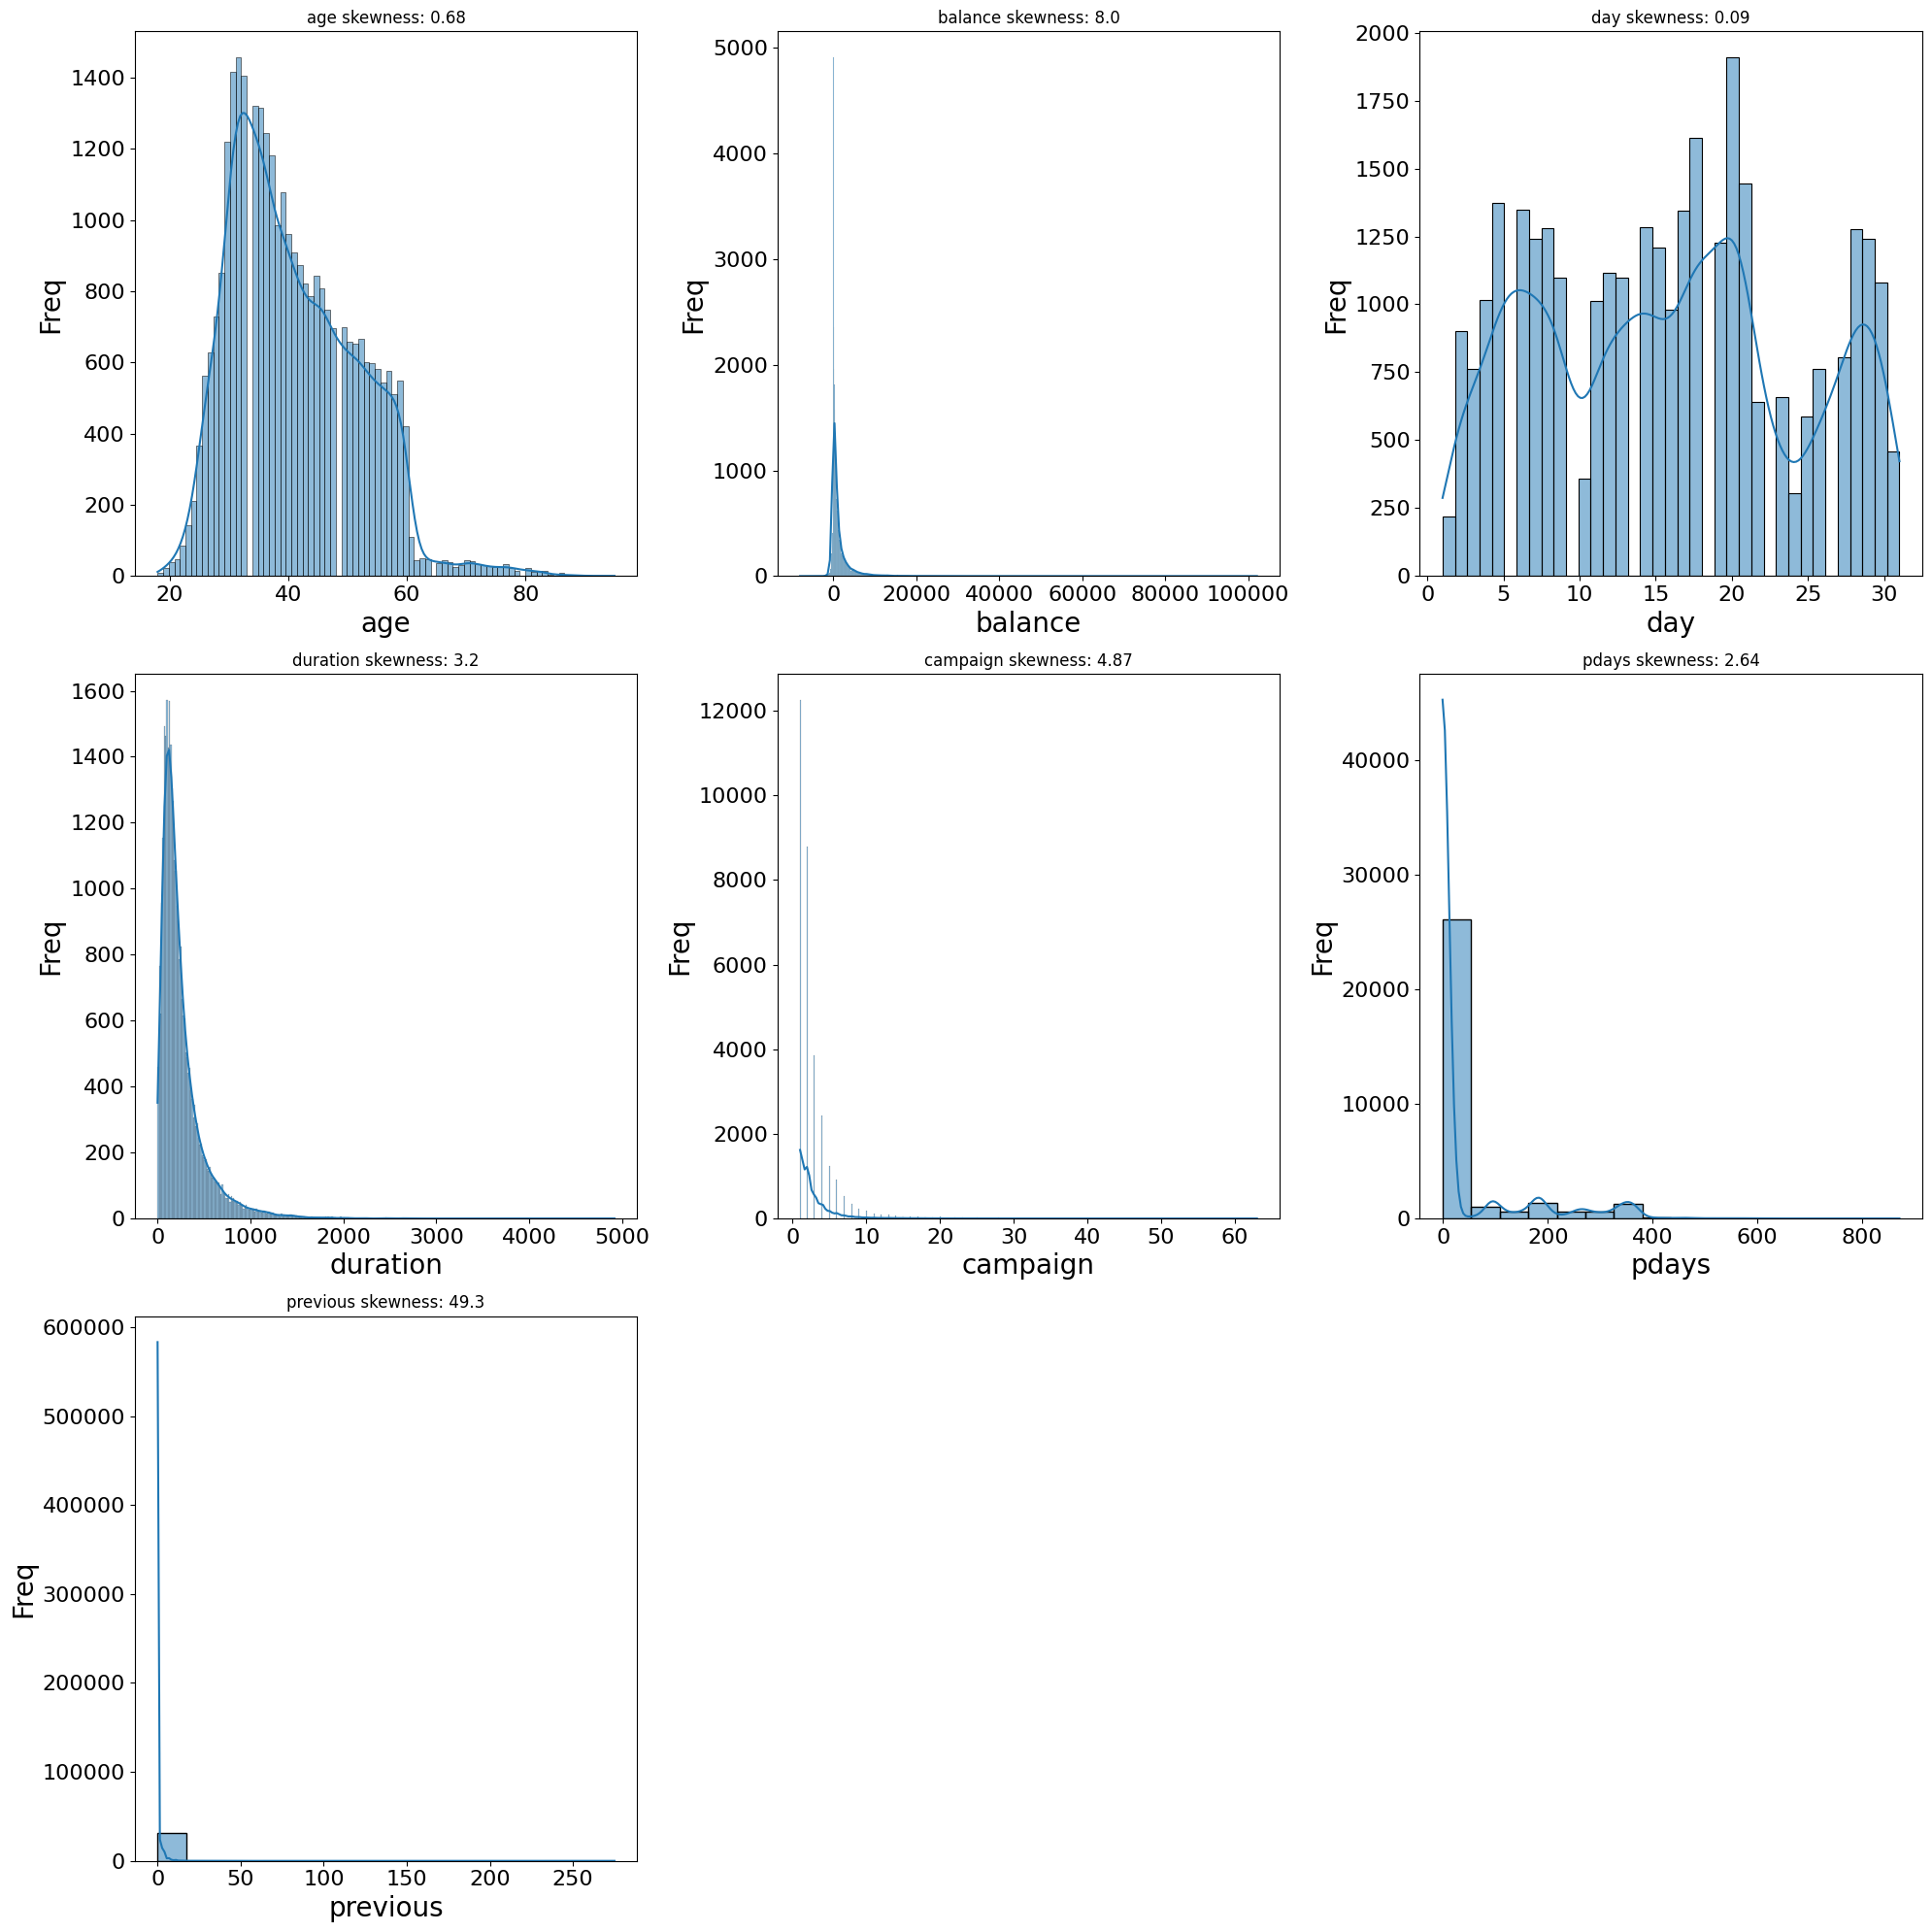

In [16]:
#Visualising the Skewness of the Numerical features while seeing the Distribution
plt.figure(figsize=(20, 20))
for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features)//2, 3, i+1)
    ax = sns.histplot(df[numerical_features[i]],kde = True)
    ax.set_xlabel(str(numerical_features[i]),fontsize = 20)
    ax.set_ylabel("Freq",fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(numerical_features[i]) + ' skewness: ' + str(round(Num_skew[i], 2)))
plt.tight_layout()
plt.show()

Skewness:
- Balance , Duration,Campaign ,pdyas ,previous col are Higly Skewed

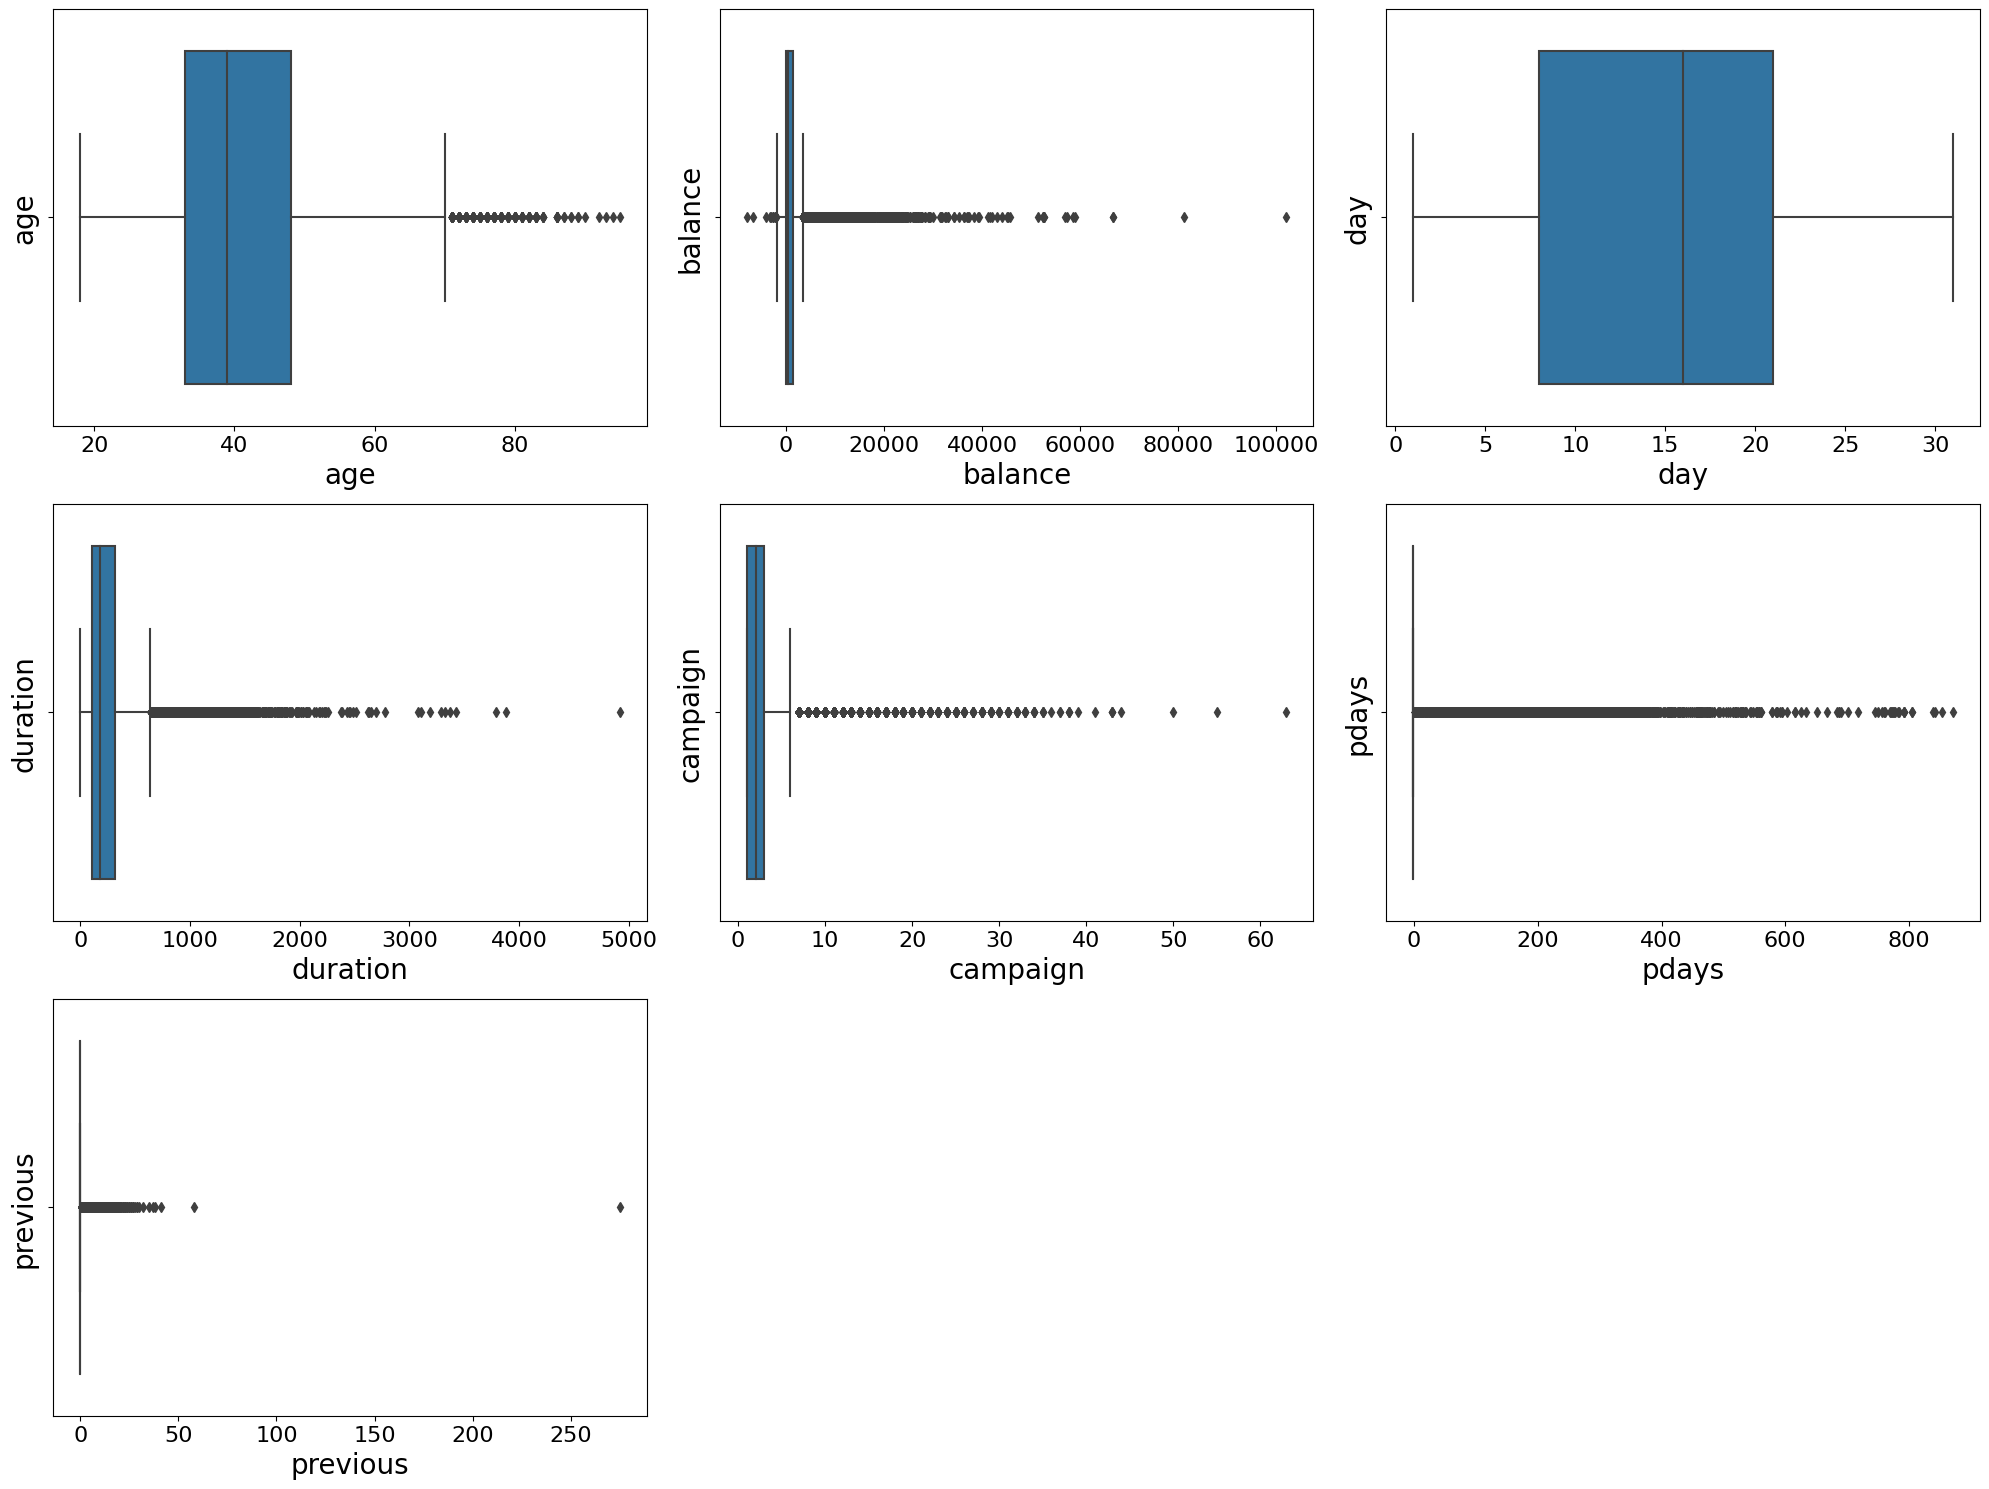

In [17]:
plt.figure(figsize=(20, 15))
for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features)//2, 3, i+1)
    ax = sns.boxplot(x = df[numerical_features[i]])
    ax.set_xlabel(str(numerical_features[i]), fontsize = 20)
    ax.set_ylabel(str(numerical_features[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

Observation:
- balance, duration,campaign,pdays and previous contain Outliers

In [18]:
Num_skew

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

##### Bivariate Analysis of Num Features

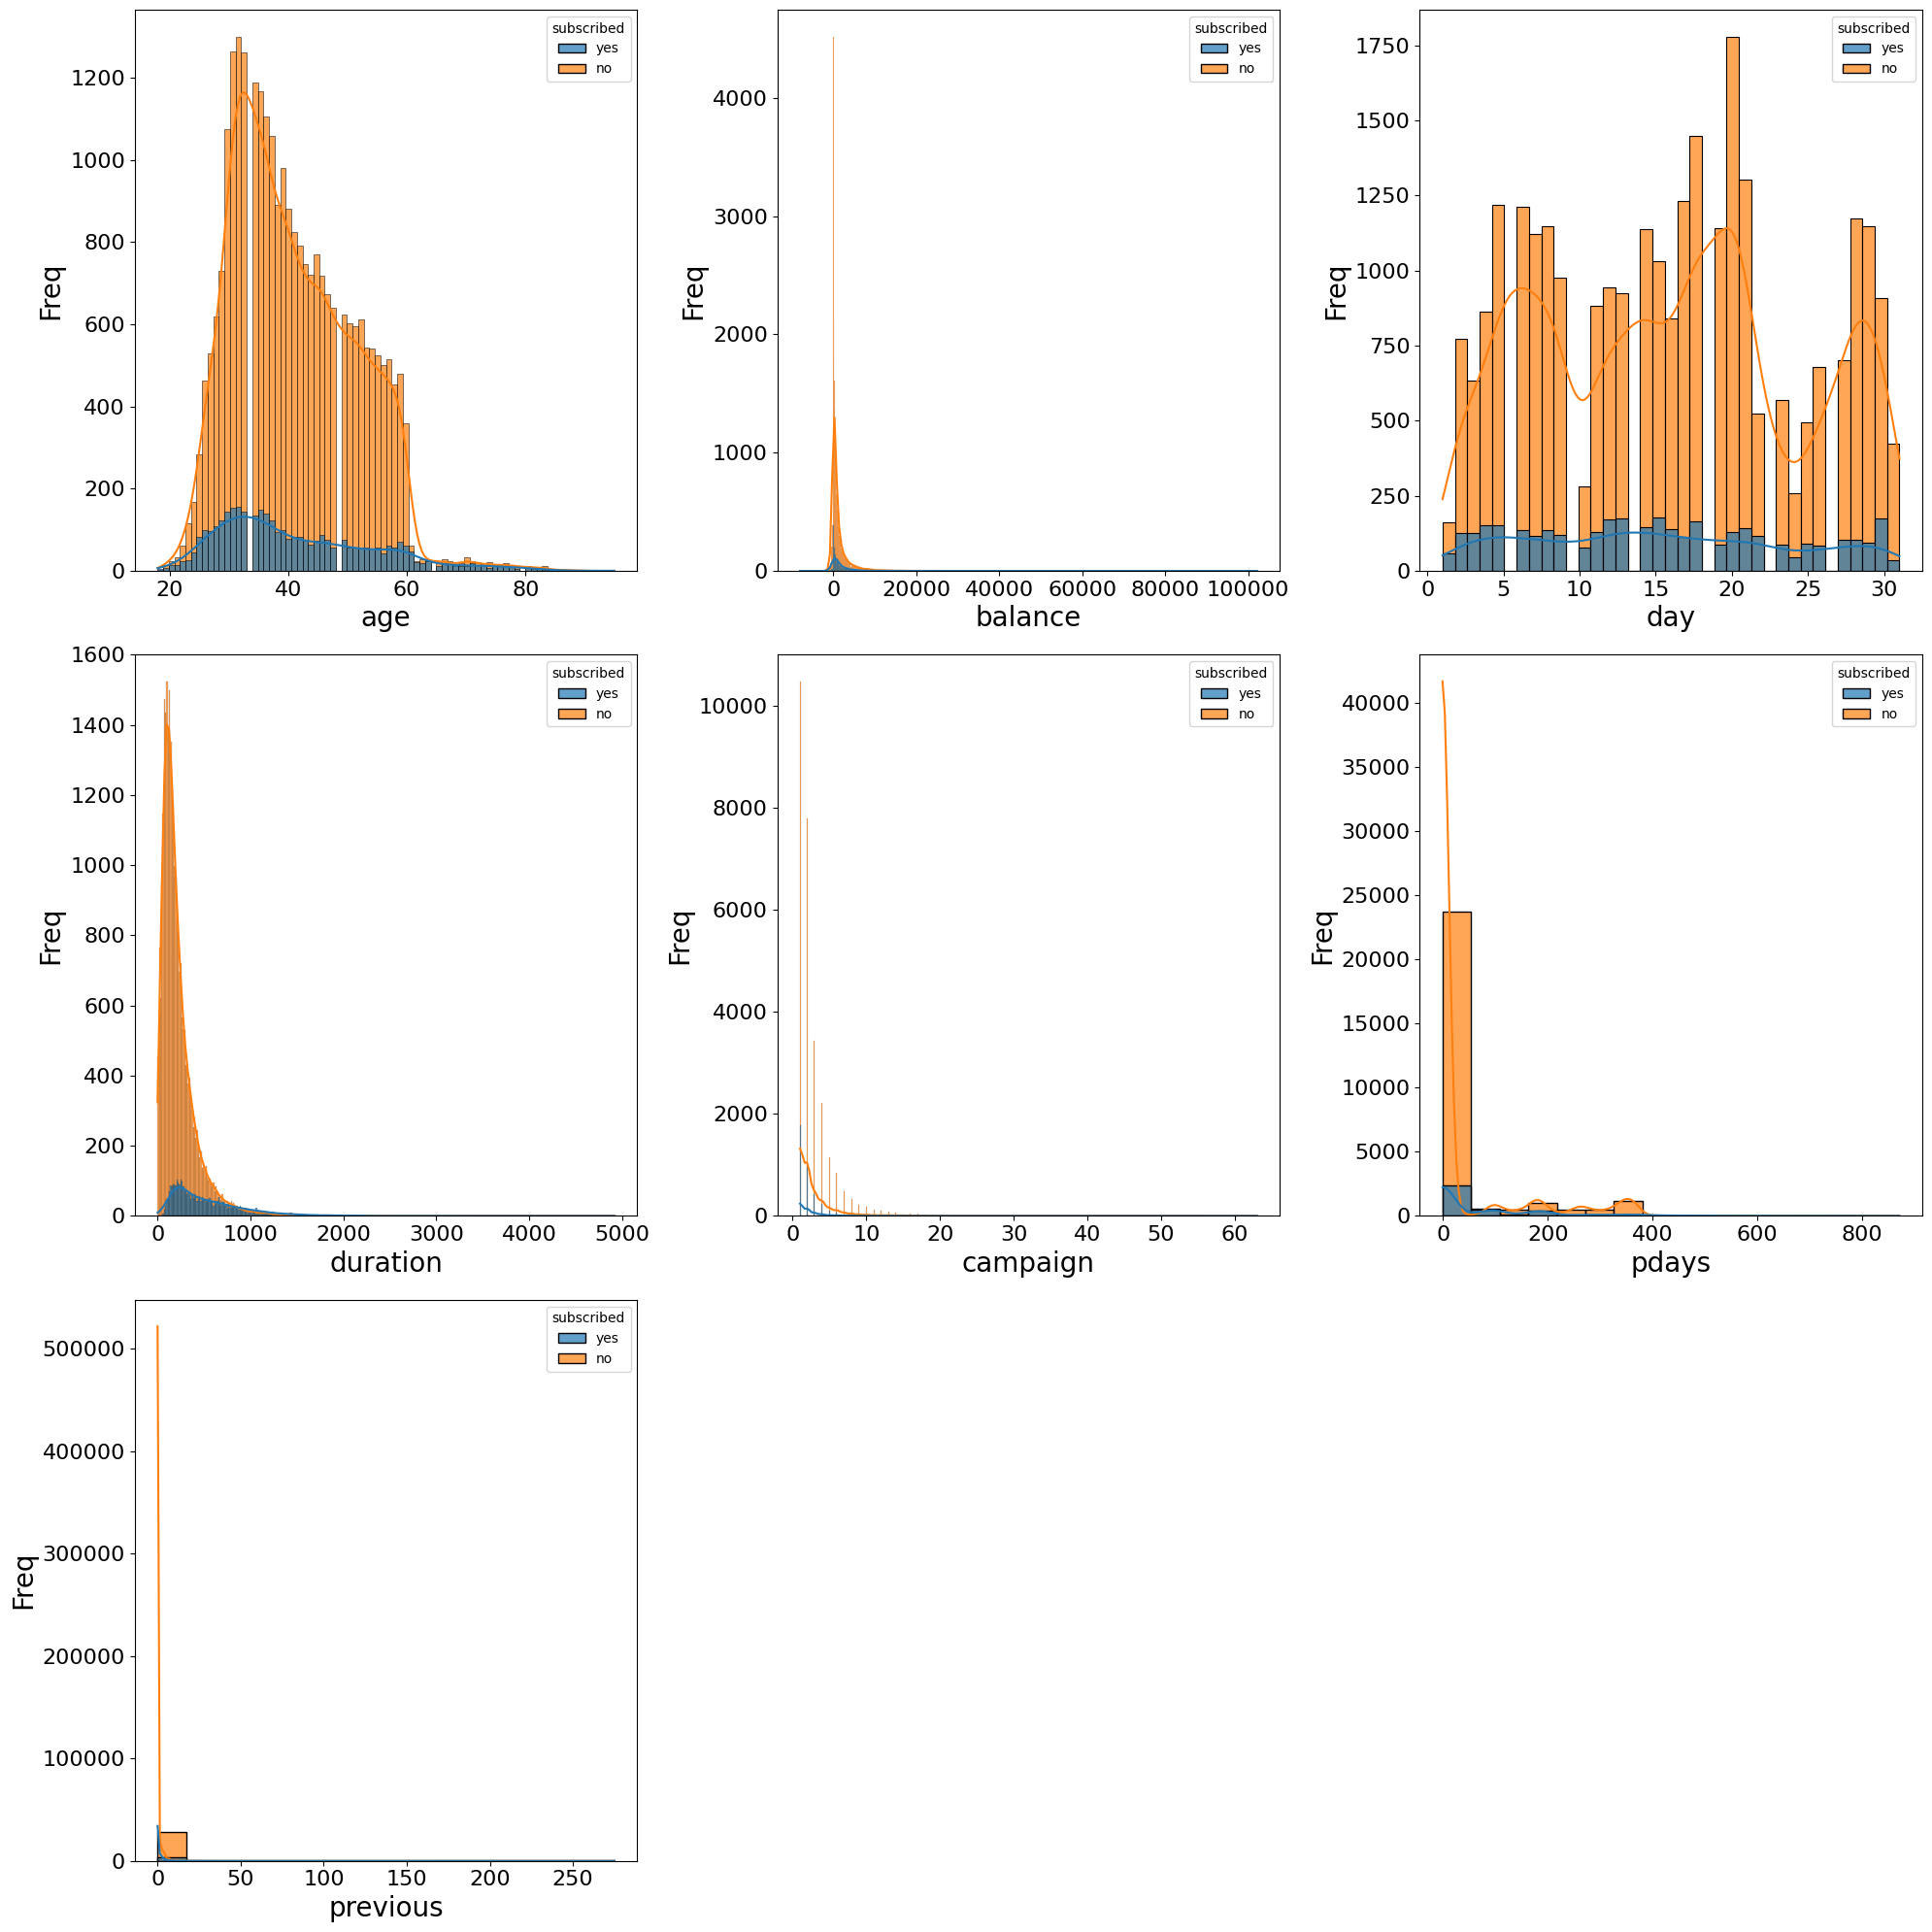

In [19]:
plt.figure(figsize=(20, 20))
for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features)//2, 3, i+1)
    ax = sns.histplot(
        x = df[numerical_features[i]], kde = True, hue_order = ["yes", "no"],
        hue = df.subscribed,
        alpha = 0.7)
    ax.set_xlabel(str(numerical_features[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

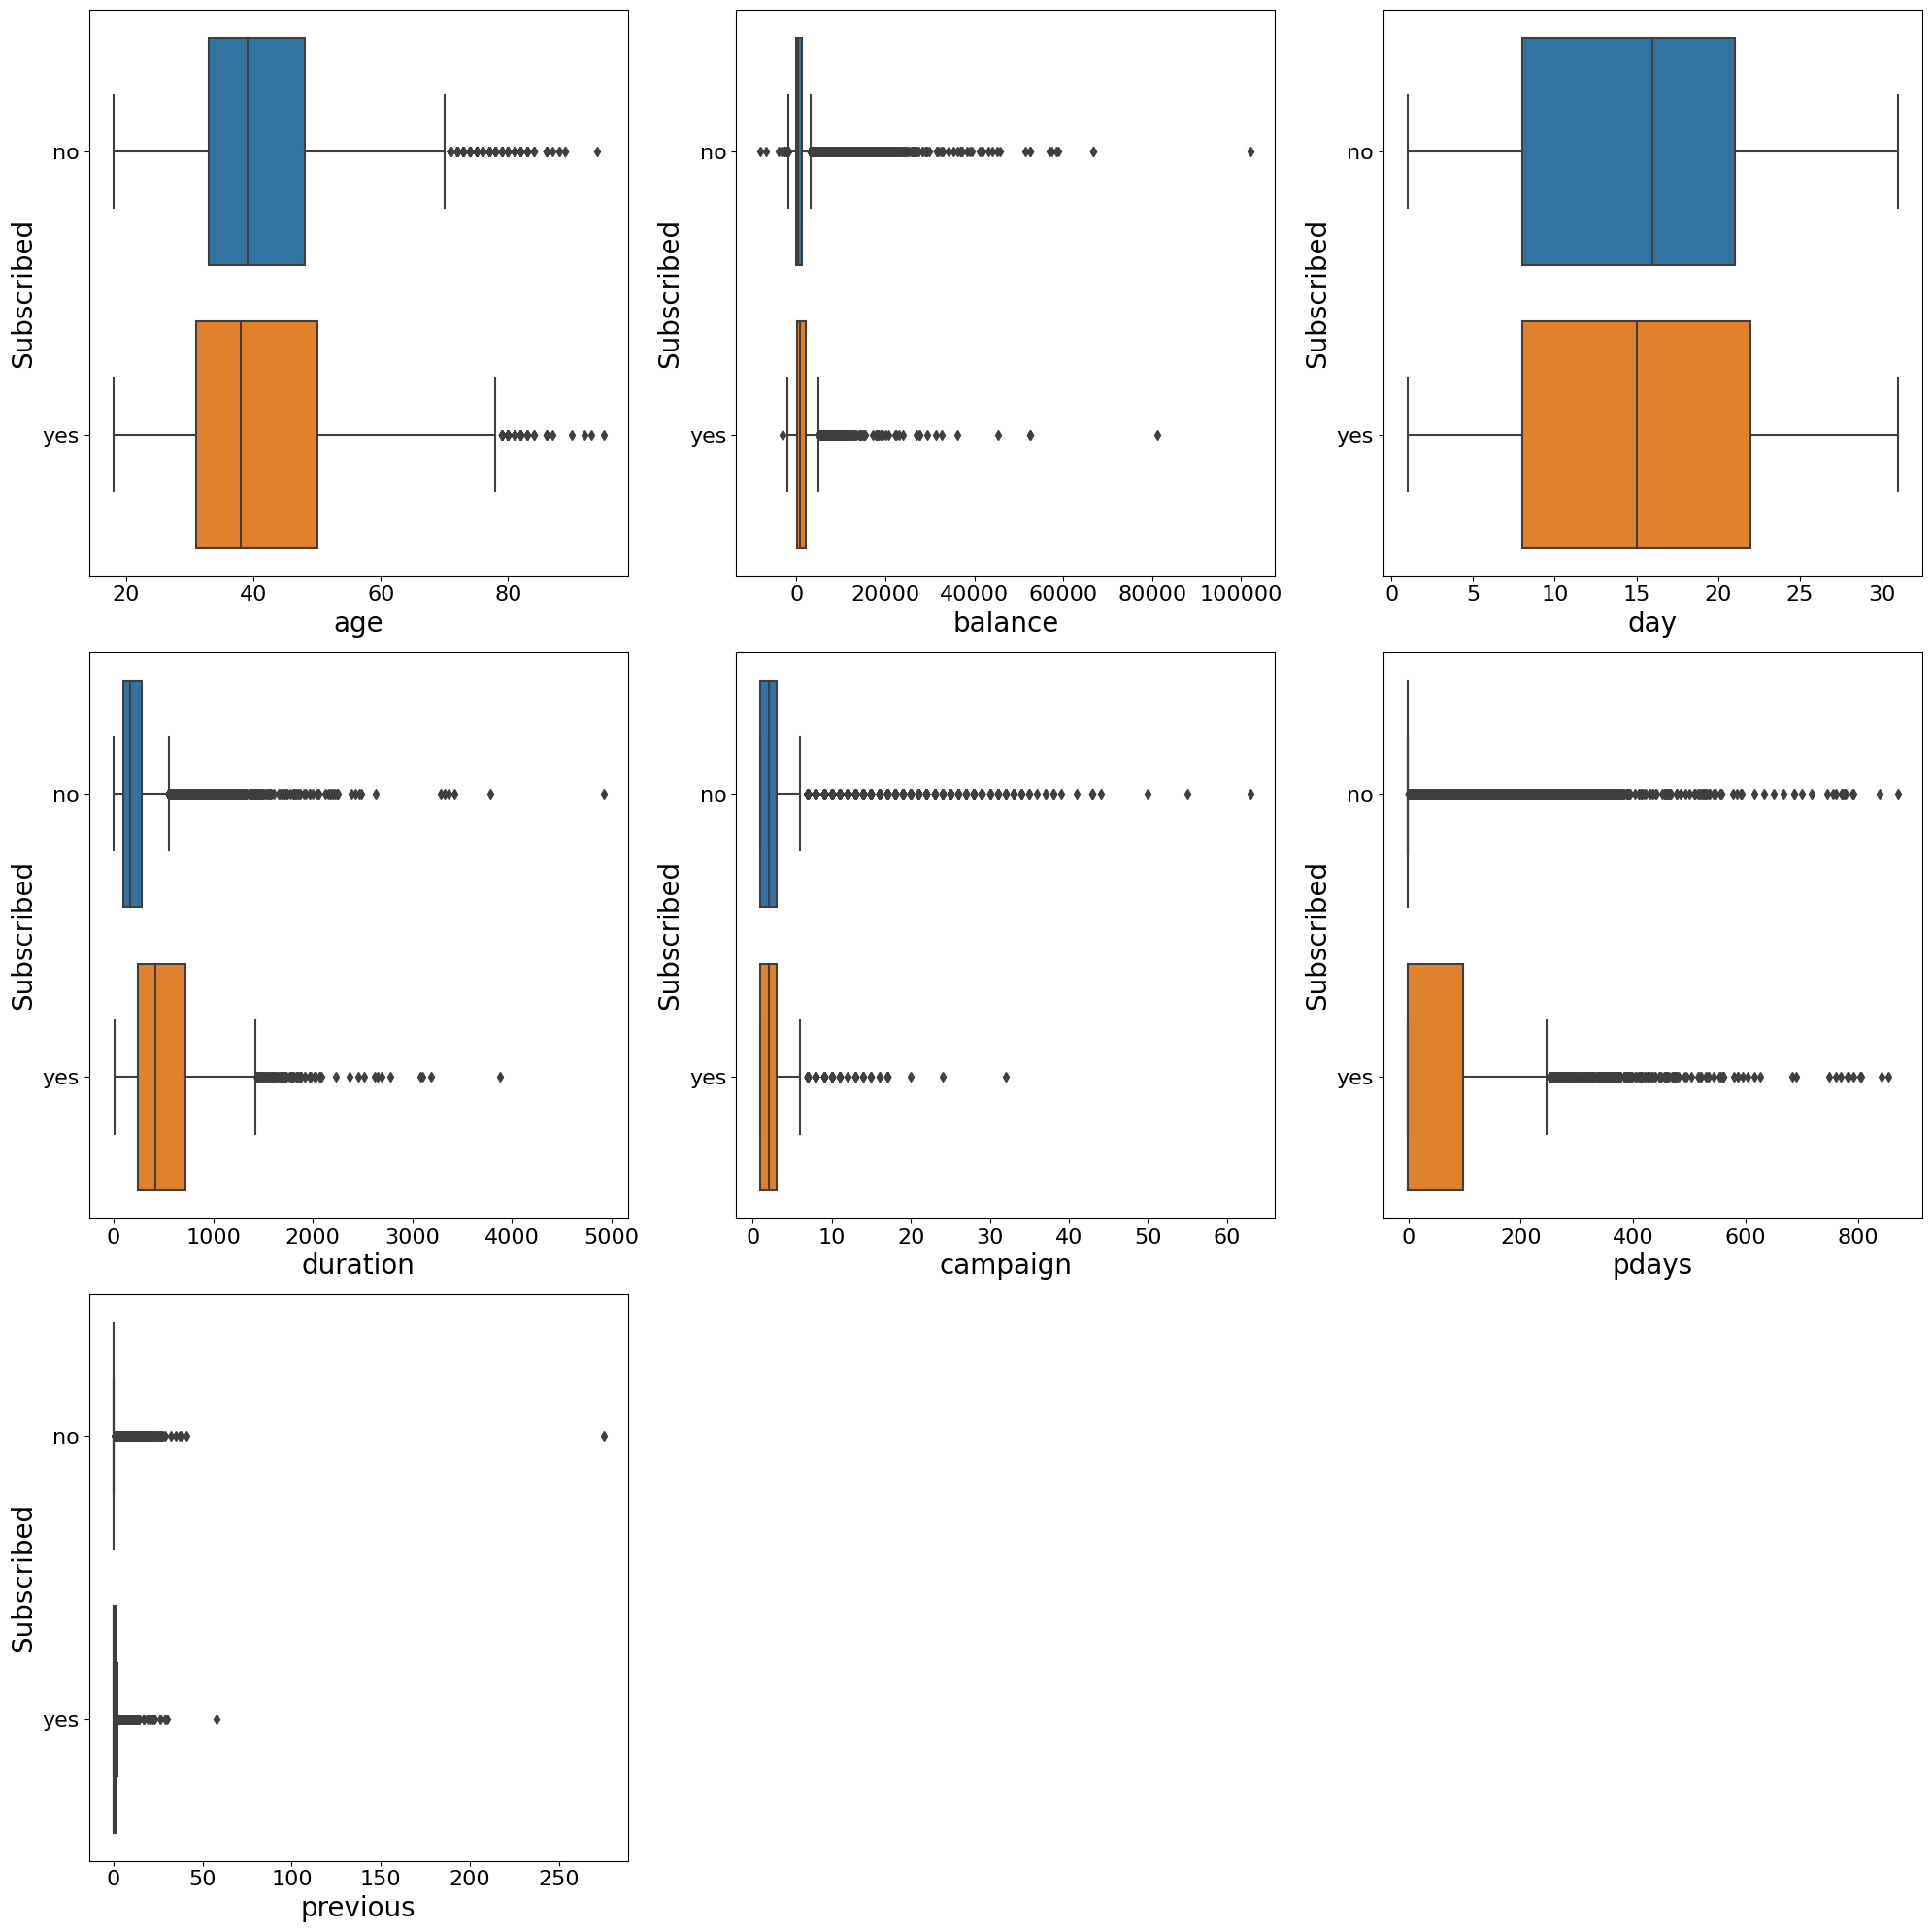

In [20]:
plt.figure(figsize=(20, 20))
for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[numerical_features[i]],
        y = df.subscribed,)
    ax.set_xlabel(str(numerical_features[i]), fontsize = 20)
    ax.set_ylabel("Subscribed", fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

In [21]:
df.groupby(["subscribed"]).median()

,age,balance,day,duration,campaign,pdays,previous
subscribed,,,,,,,
no,39.0,418.0,16.0,164.0,2.0,-1.0,0.0
yes,38.0,746.0,15.0,423.0,2.0,-1.0,0.0


- Both customers that subscribed and didn't subscribe has a median age of 38-39.

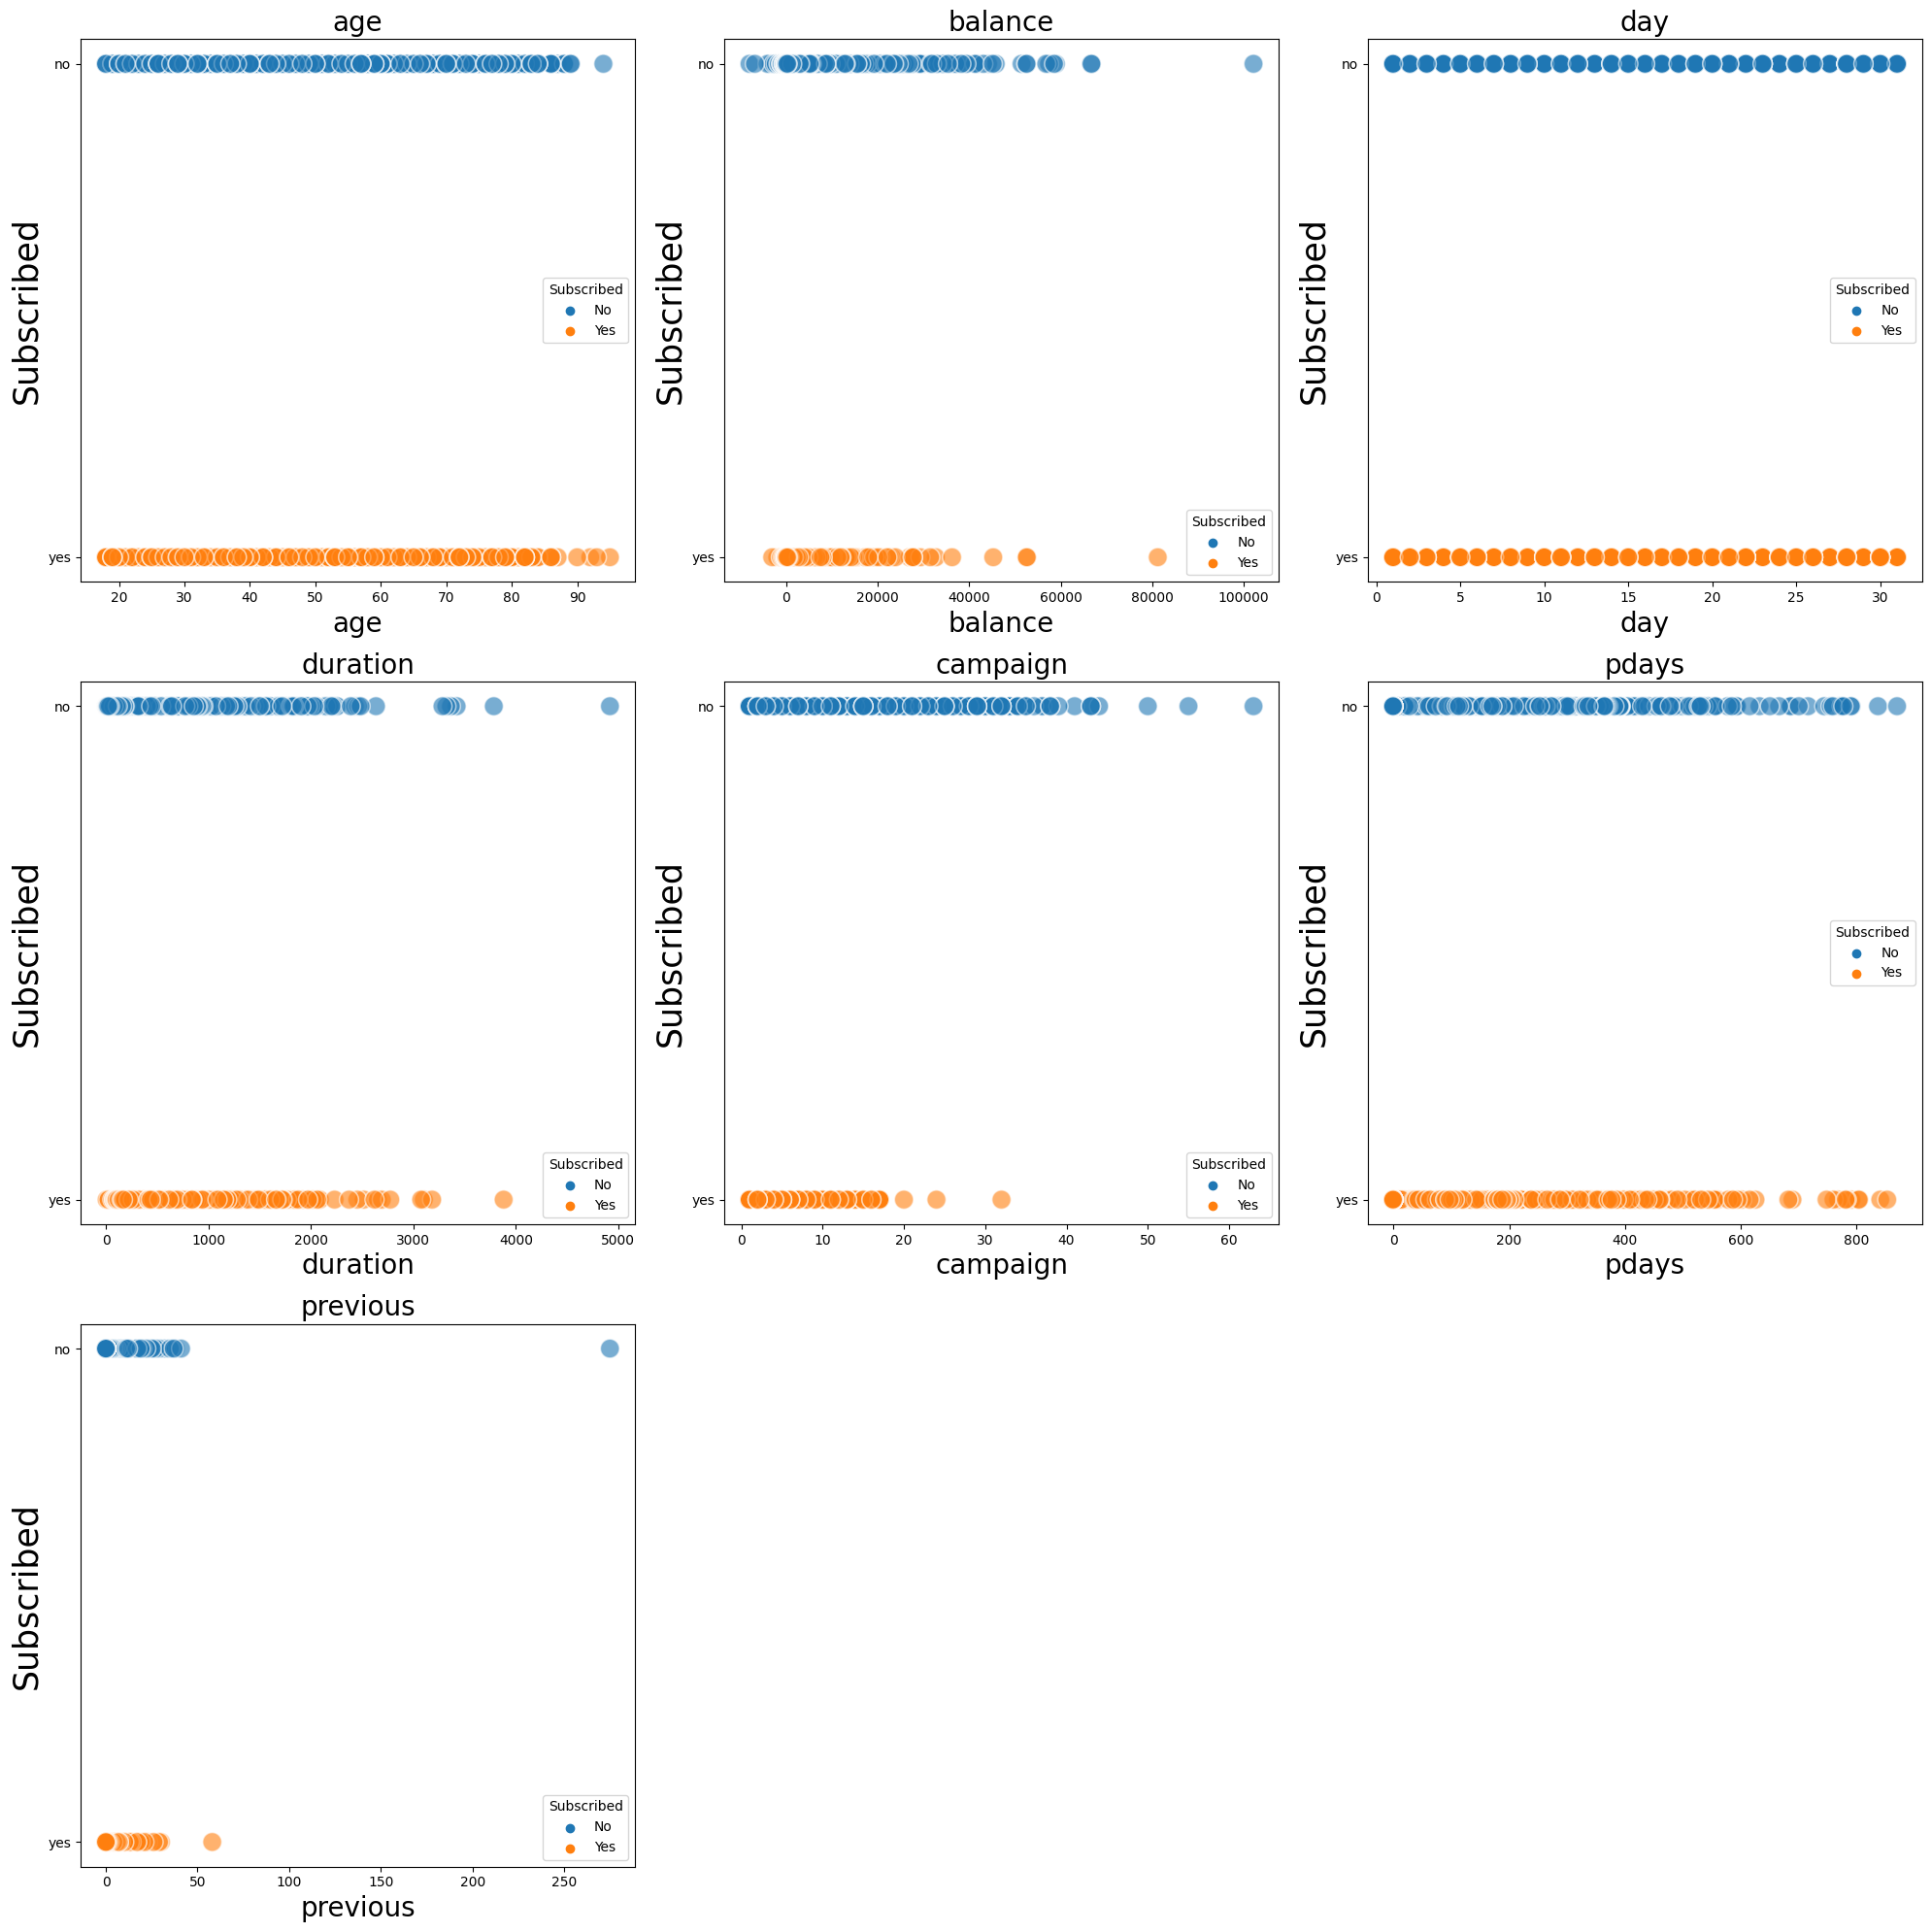

In [22]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features)//2, 3, i + 1)
    ax = sns.scatterplot(x = df[numerical_features[i]], y = df.subscribed, hue = df.subscribed, s = 200, alpha = 0.6)
    ax.set_title(numerical_features[i], fontsize = 20)
    ax.set_xlabel(xlabel=numerical_features[i], fontsize=20)
    ax.set_ylabel(ylabel="Subscribed",fontsize=25)
    
    L = ax.legend(title="Subscribed")
    L.get_texts()[0].set_text('No')
    L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()


### Categorical Features

##### Univariate Analysis of Categorical Features

In [23]:
categorical_Features = list(df.select_dtypes('object').drop(columns=["subscribed"]).columns)
categorical_Features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

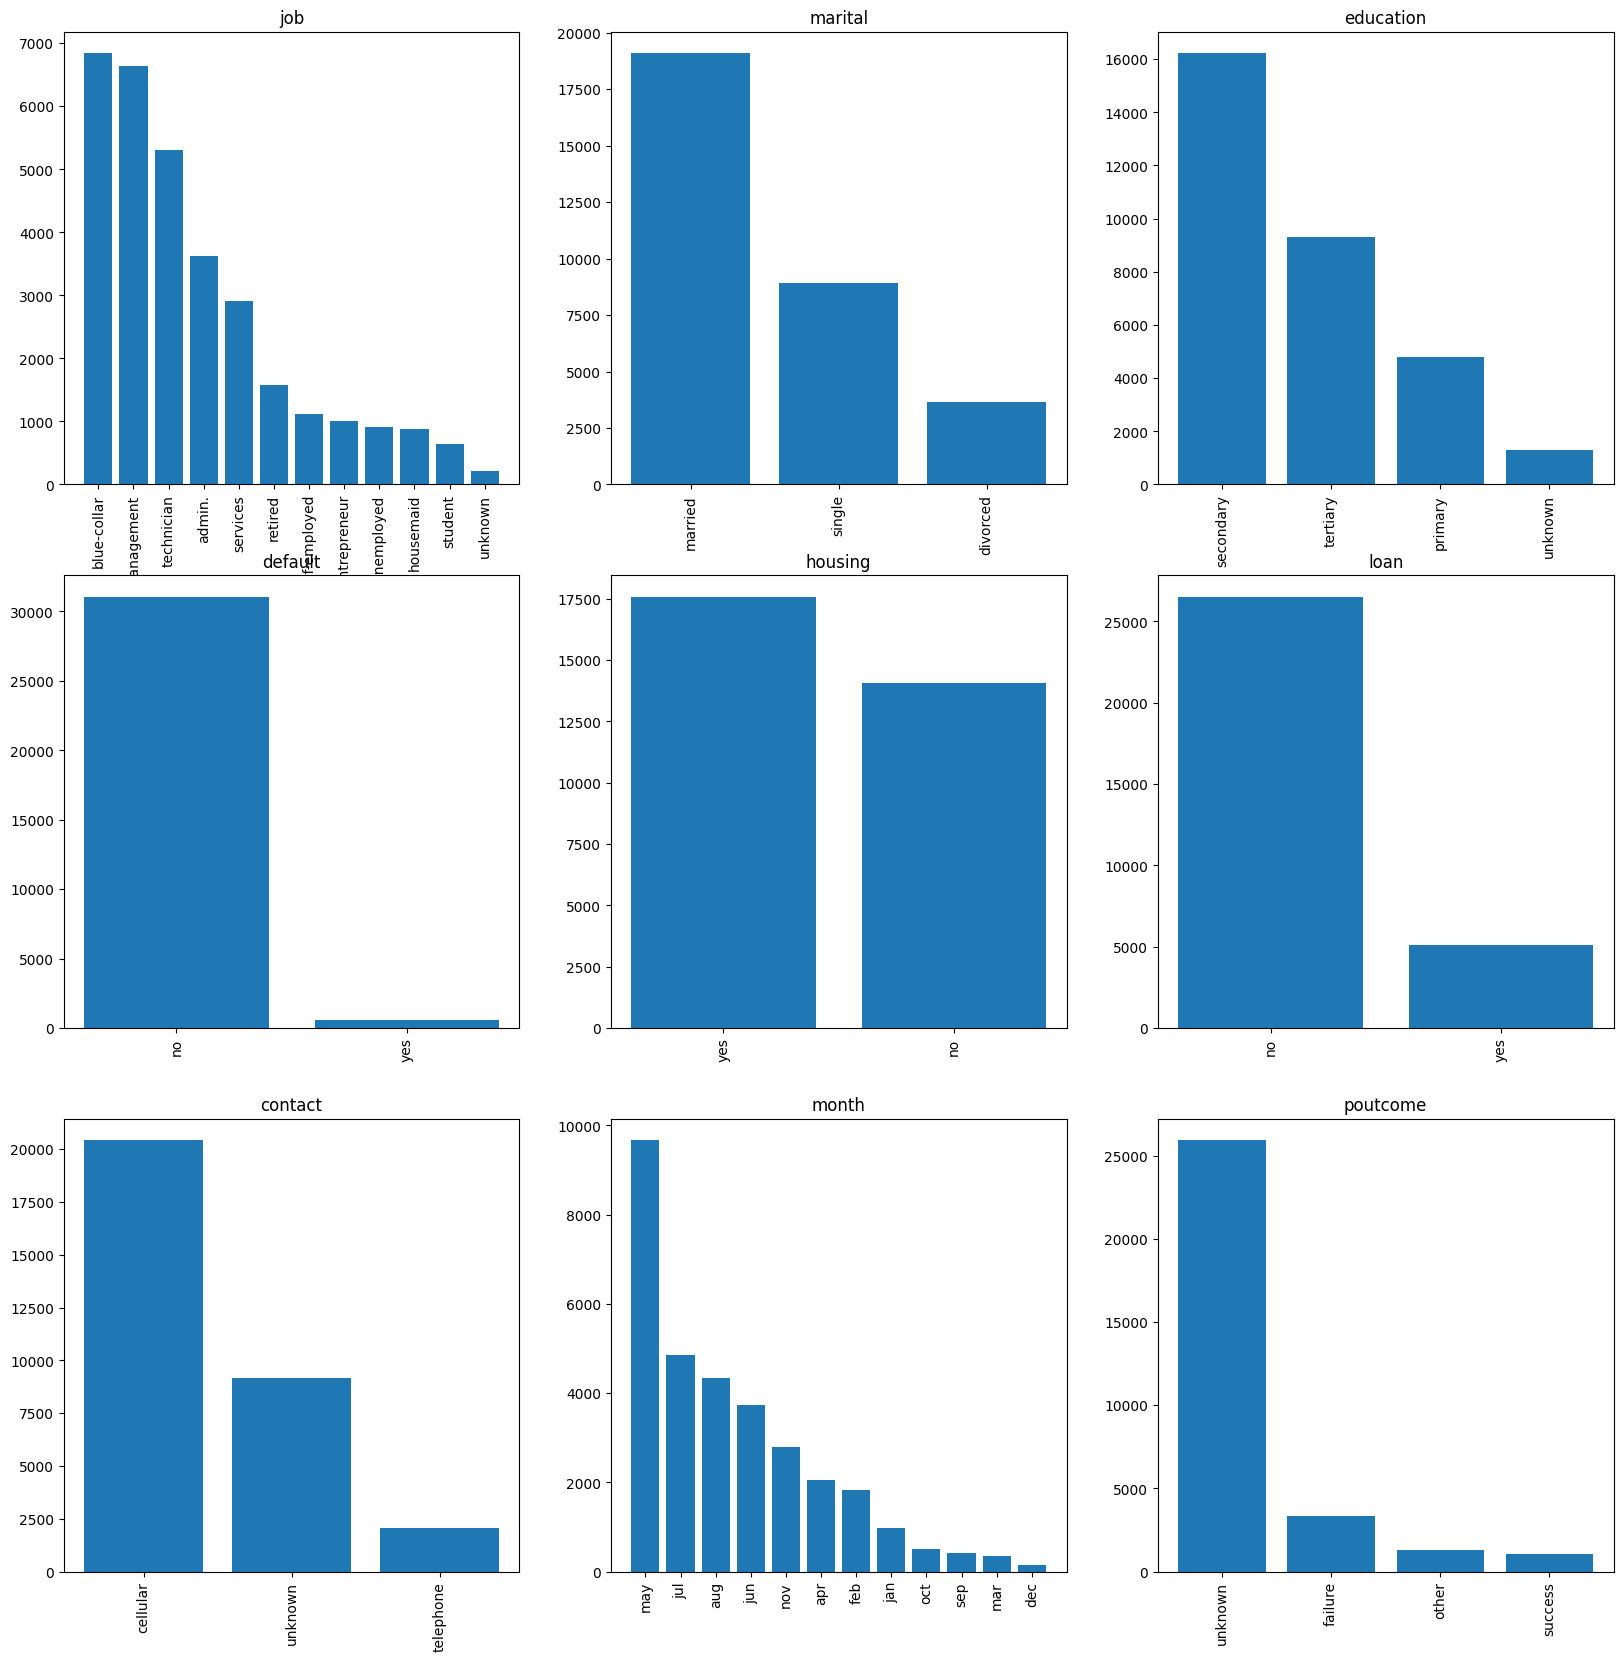

In [24]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 20))
counter = 0
for Cat_feat in categorical_Features:
    value_counts = df[Cat_feat].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(Cat_feat)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

#### Bivariate

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


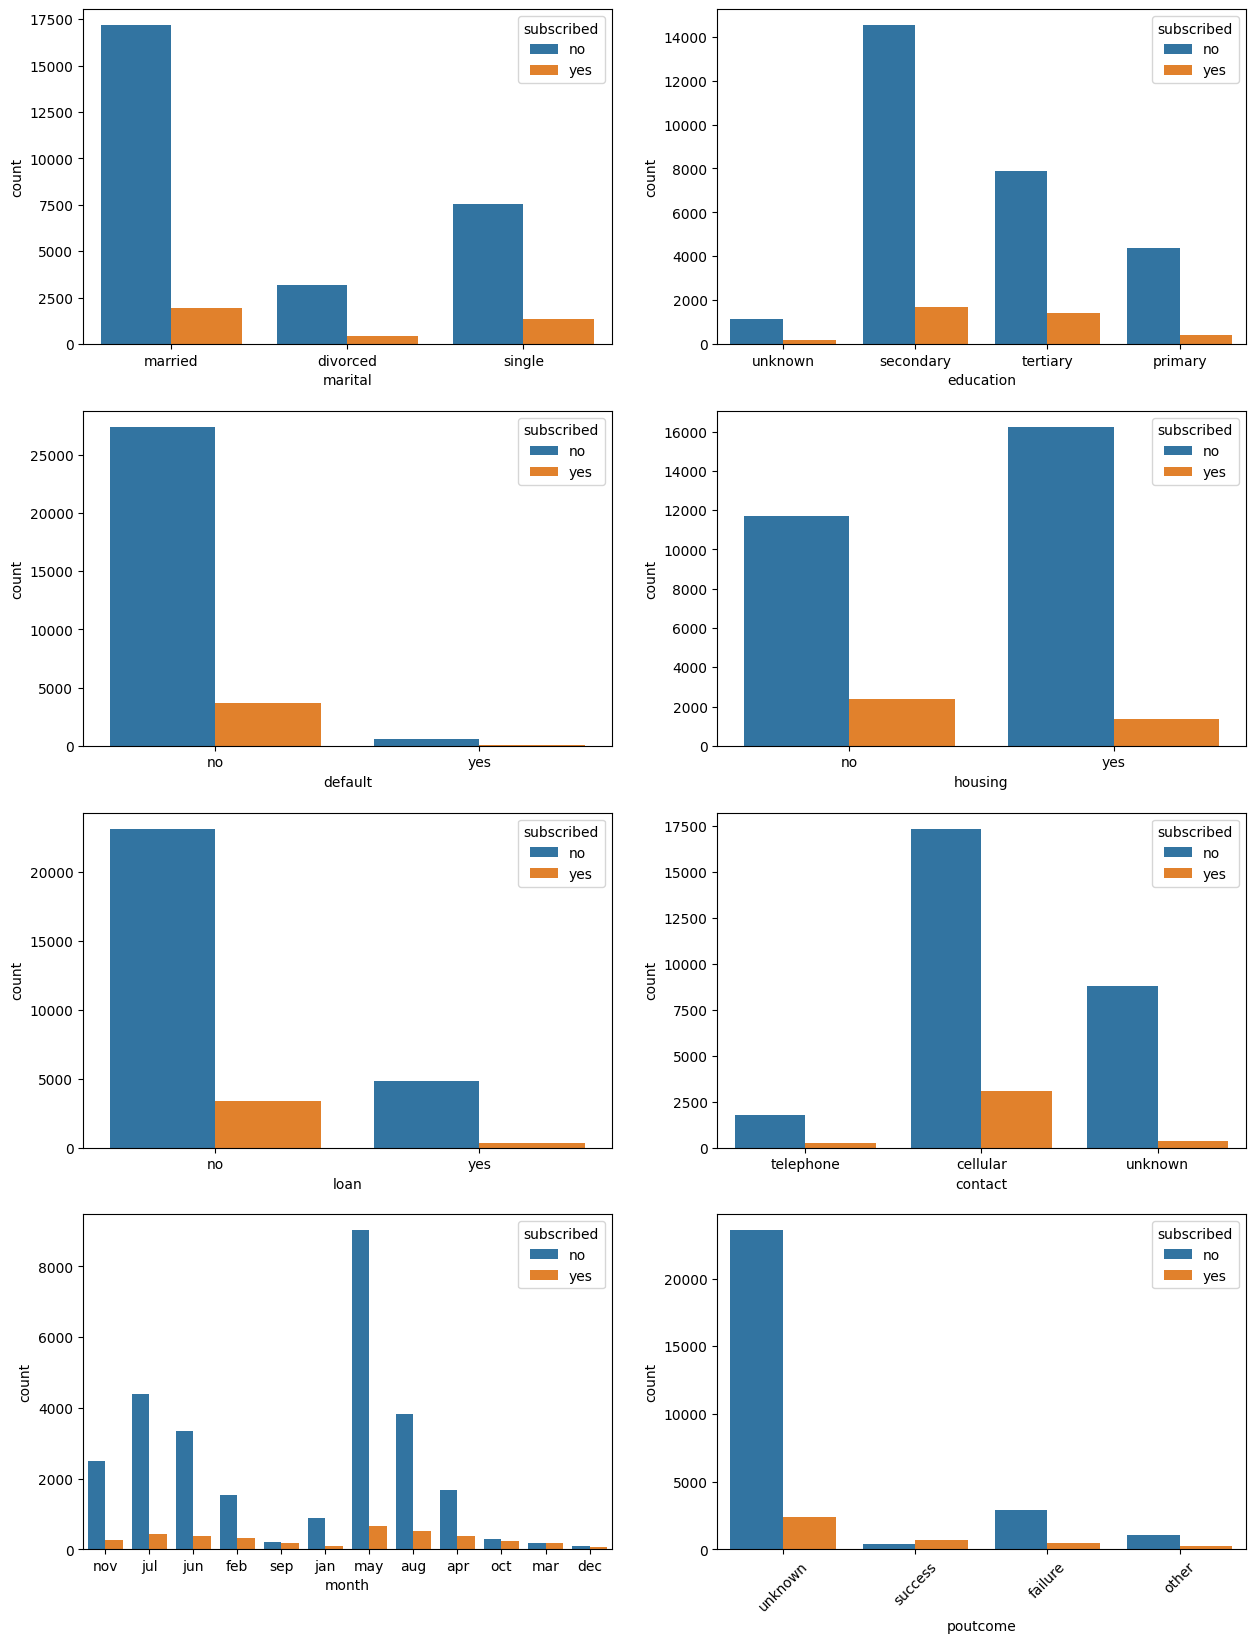

In [26]:
#lets ahve a look at how  target variable ' target' distrubuted across  individual atrributes ,using income as hue
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
plt.xticks(rotation=45)
for i, column in enumerate(categorical_Features[1:]):
    row = i // 2
    col = i % 2
    sns.countplot(df[column], hue=df['subscribed'], ax=axs[row, col])


<AxesSubplot: xlabel='job', ylabel='count'>

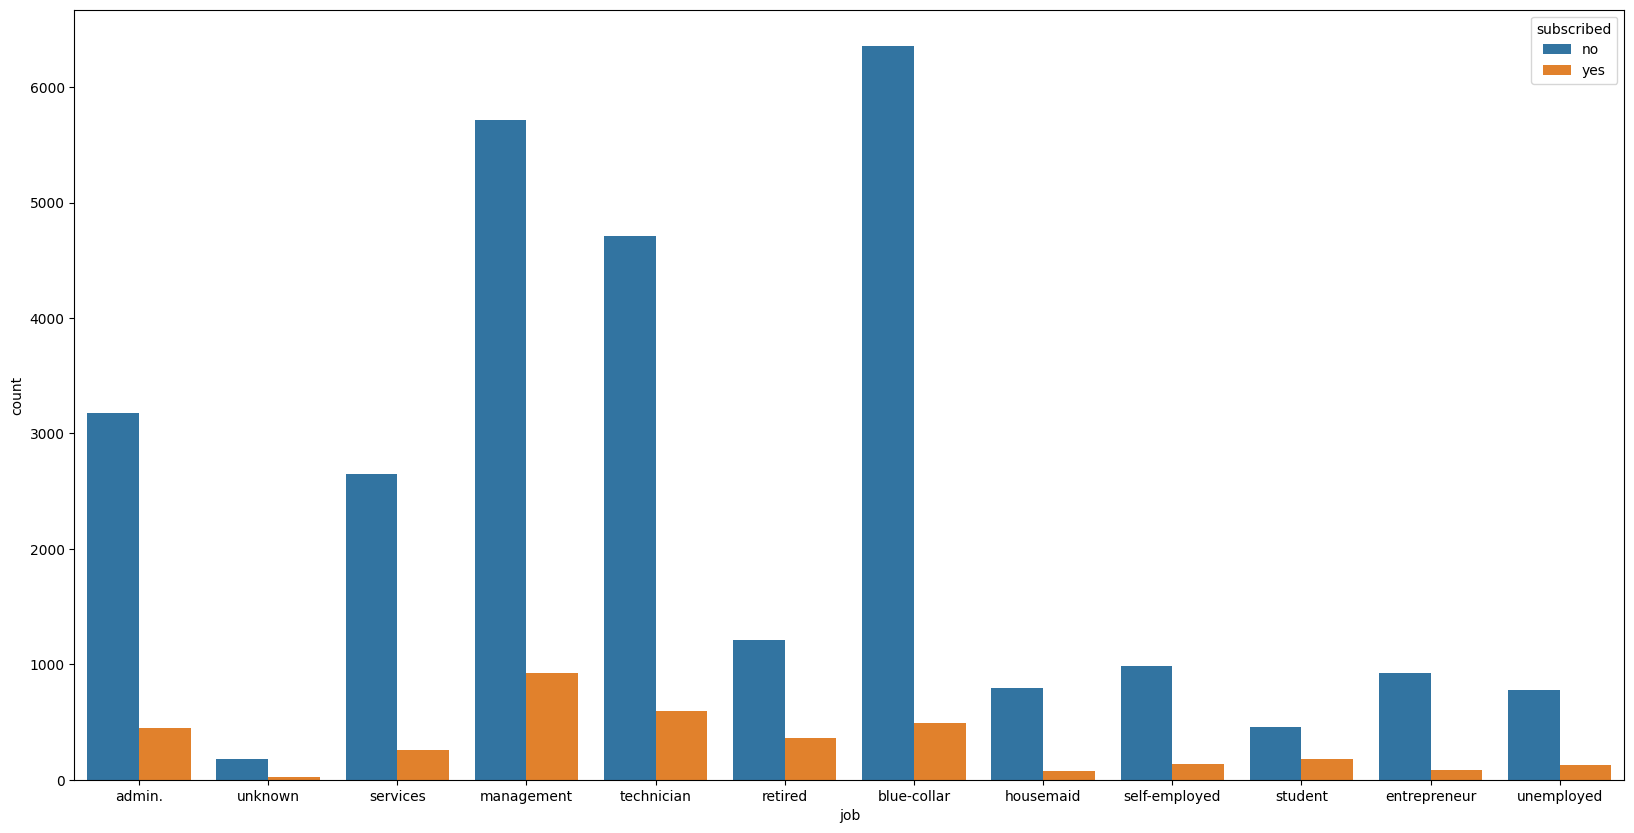

In [27]:
# lets have look  a at job cloumn over targer varible'Target'

plt.subplots(1,1,figsize=(20,10))

sns.countplot(df['job'],hue=df['subscribed'])

#### Observation:
- Majority of people have the nonexistent outcomes of the previous marketing campaign (poutcome), no personal loan (loan), no credit in default.
- Majority of people have a job as admin, blue-collar, and technician.
- Majority of people have a university degree.
- Majority of people are married.
- Majority of people have no default credit.
- Majority of people have housing loans.
- Majority of people have no personal loan.
- Majority of people have cellular contacts.
- Majority of people are last contacted in may.
- Majority of people have the nonexistent outcomes from the previous marketing campaign.

In [28]:
df.duration

0          44
1          91
2         240
3         867
4         380
         ... 
31642     116
31643     438
31644      37
31645      22
31646    1973
Name: duration, Length: 31647, dtype: int64

In [29]:
# Visualize the distribution of 'duration' & 'campaign'
# duration cloumn is havig high impact on target variable  as given in attribute info of dataset 

In [30]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df_test['duration'] = df_test['duration'].apply(lambda n:n/60).round(2)
print(df.duration)

0         0.73
1         1.52
2         4.00
3        14.45
4         6.33
         ...  
31642     1.93
31643     7.30
31644     0.62
31645     0.37
31646    32.88
Name: duration, Length: 31647, dtype: float64


In [31]:
# Step 1: Drop rows that 'duration' < 5s
condition = (df['duration']<5/60)
df = df.drop(df[condition].index, axis = 0, inplace = False)

#For test data
condition1 = (df_test['duration']<5/60)
df_test = df_test.drop(df_test[condition1].index, axis = 0, inplace = False)

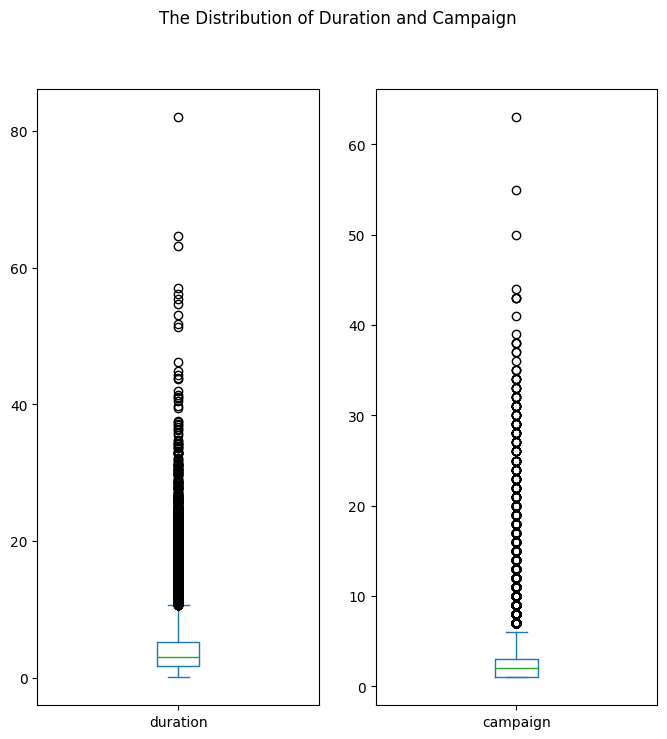

In [32]:
duration_camp = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

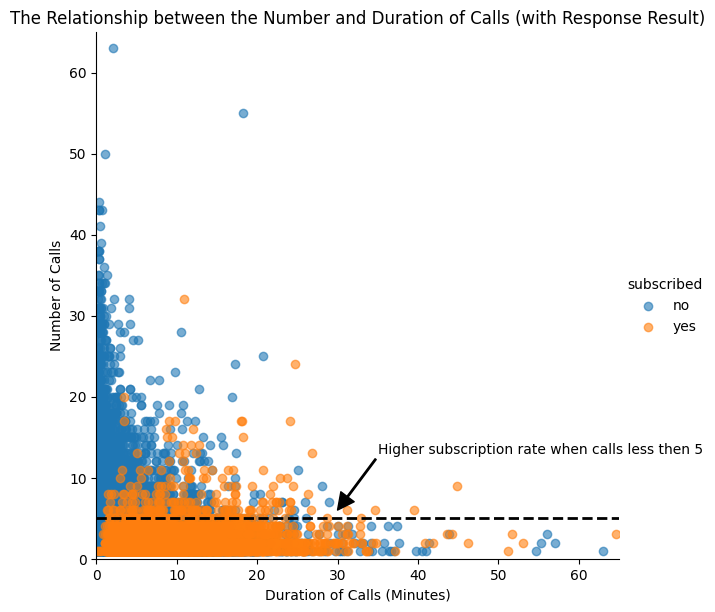

In [33]:
#Visualize the relationship between 'duration' & 'campaign': with Traget  result
duration_camp = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'subscribed',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =6)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls less then 5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Observation:
- 'duration' attribute highly affects the output

we can observe from above analsysis that when calls are lesser than 5 and we can see more number of subscriptions

### Correlation

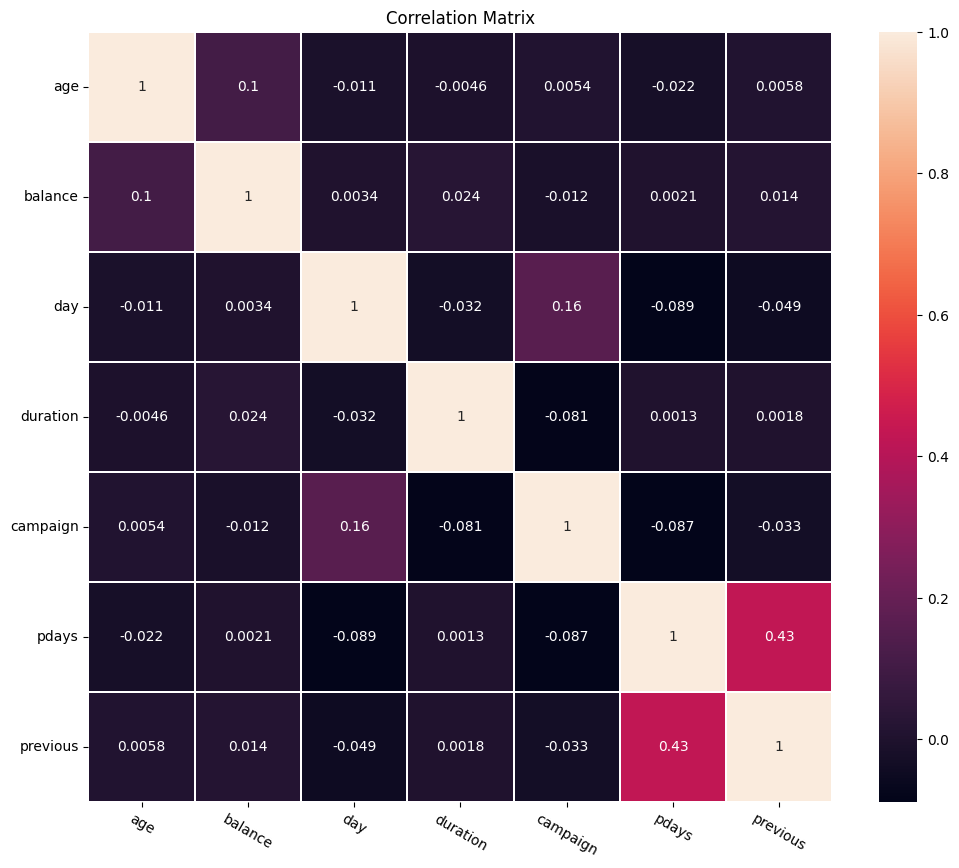

In [34]:
#checking the co relationship with all the varibles
corr = df.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

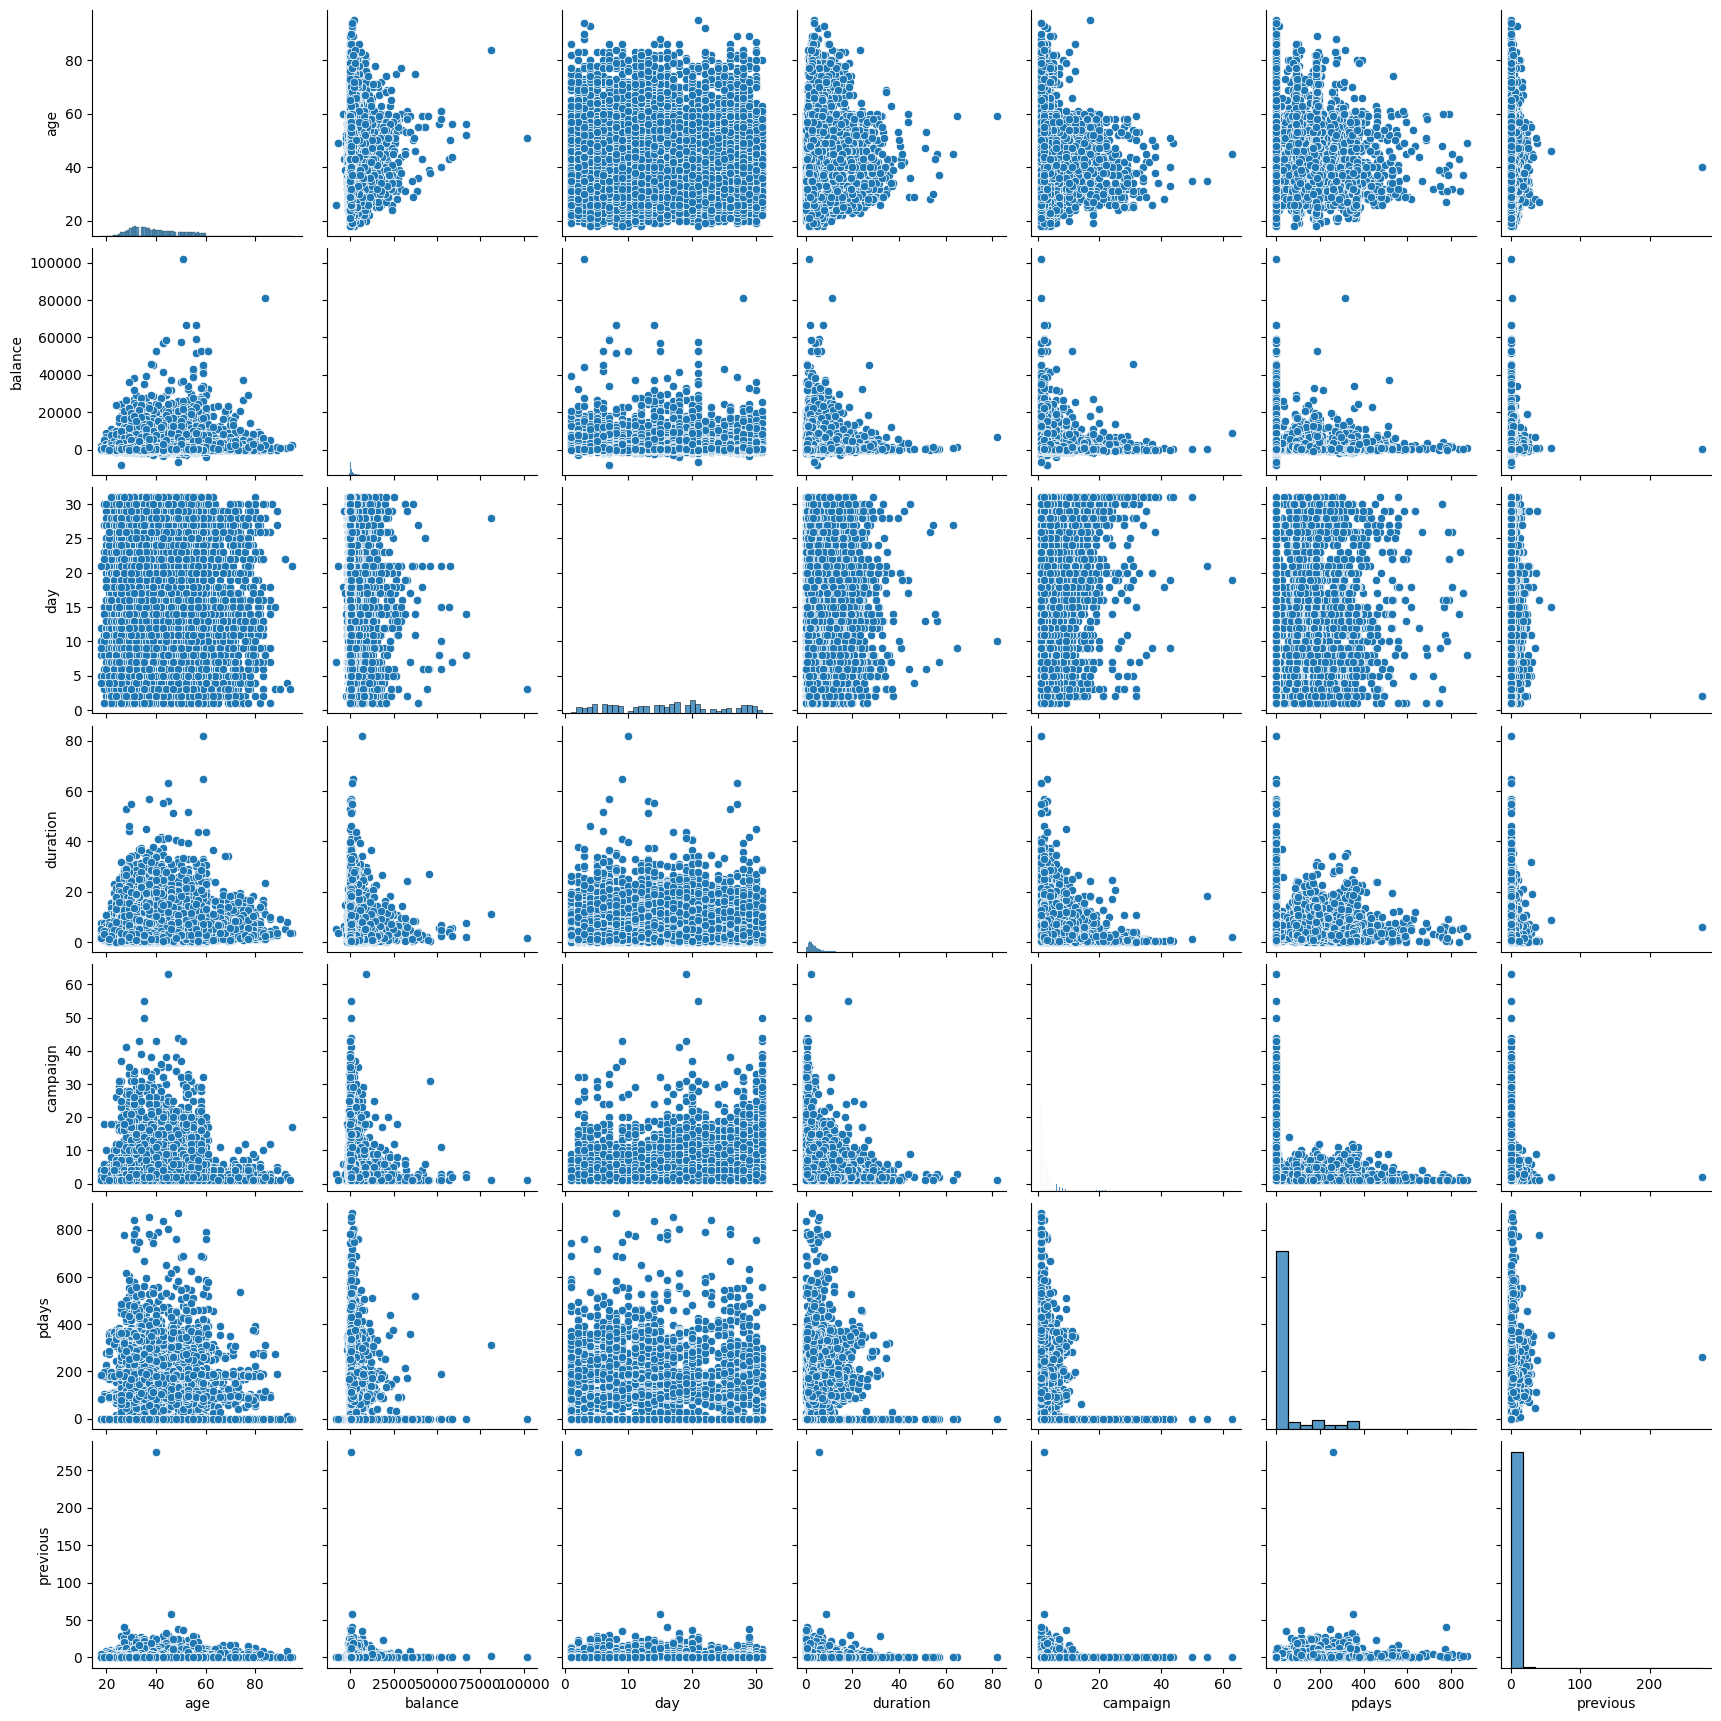

In [35]:
sns.pairplot(df)

In [36]:
df.groupby(["subscribed"]).count()[["age"]].rename({"age" : "Count"}, axis = 1)

,Count
subscribed,
no,27894
yes,3715


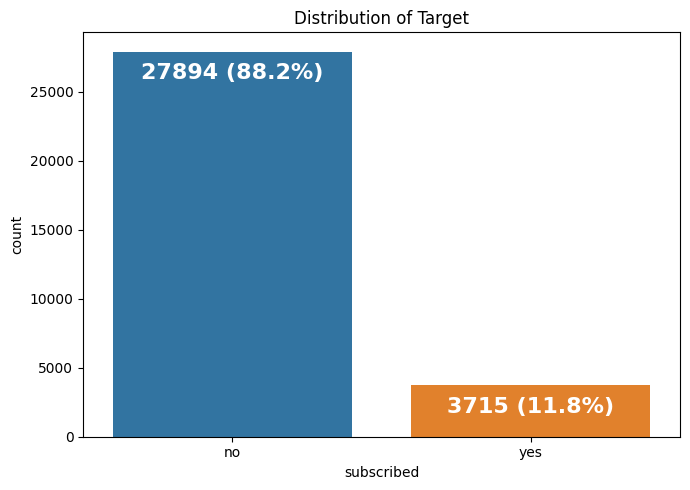

In [37]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(
    x = df["subscribed"],
)
ax.set_title("Distribution of Target")
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -20), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

Observation:
- The Dataset is highlyImbalanced

In [38]:
df["target"] = df["subscribed"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["subscribed"], inplace = True)

In [39]:
df.target

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: target, Length: 31609, dtype: int64

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,-1,0,unknown,0


#### Replacing and String Formatting

In [41]:
df.job.unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [42]:
#Replacing '.' in the admin columns for train and test data
df["job"] = df["job"].str.replace('.', '', regex = False)
df_test["job"] = df_test["job"].str.replace('.', '', regex = False)

In [43]:
df["pdays"].value_counts()

-1      25892
 182      118
 92       100
 91        87
 183       85
        ...  
 66         1
 51         1
 20         1
 493        1
 382        1
Name: pdays, Length: 504, dtype: int64

### Feature Selection

- Based on EDA, we see there's some of the numerical features that are highly correlated. Therefore we should remove the highly correlated features so that our model doesn't confuse which feature that affect the decision. But to understand the whole correlation we will calculate VIF (Variation Inflation Factor).

In [44]:
df_features = df.drop(columns=["target"])
df_features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.93,2,-1,0,unknown
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.30,2,-1,0,unknown
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.62,3,-1,0,unknown
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.37,7,337,12,failure


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,5.007273
1,balance,1.216984
2,day,3.971463
3,duration,1.904969
4,campaign,1.815134
5,pdays,1.411830
6,previous,1.296106


In [46]:
df = df.drop('pdays',axis = 1)
df_test = df_test.drop('pdays',axis = 1)

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,target
0,56,admin,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,0,unknown,0


## Feature Encoding

In [48]:
categorical_Features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [49]:
# For train data
df['housing'] = df["housing"].apply(lambda x: 1 if x == "yes" else 0)
df['loan'] = df["loan"].apply(lambda x: 1 if x == "yes" else 0)
df['default'] = df["default"].apply(lambda x: 1 if x == "yes" else 0)

#For test data
df_test['housing'] = df_test["housing"].apply(lambda x: 1 if x == "yes" else 0)
df_test['loan'] = df_test["loan"].apply(lambda x: 1 if x == "yes" else 0)
df_test['default'] = df_test["default"].apply(lambda x: 1 if x == "yes" else 0)

df[['housing','loan','default']].head()

,housing,loan,default
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,1,0,0


In [50]:
print(df.job.unique())
print(df.marital.unique())
print(df.education.unique())
print(df.contact.unique())
print(df.month.unique())
print(df.poutcome.unique())

['admin' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['unknown' 'secondary' 'tertiary' 'primary']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']


In [51]:
edu_dict = {
    'tertiary': 0,
    'secondary': 1,
    'primary': 2,
    'unknown': 3
}
df['education'] = df['education'].map(edu_dict)
df_test['education'] = df_test['education'].map(edu_dict)

In [52]:
marraige_dict = {
    'married' : 0,
    'single' : 1,
    'divorced' : 2
}
df['marital'] = df['marital'].map(marraige_dict)
df_test['marital'] = df_test['marital'].map(marraige_dict)

In [53]:
contact_dict = {
    'telephone':0,
    'cellular':1 ,
    'unknown' : 2
}
df['contact'] = df['contact'].map(contact_dict)
df_test['contact'] = df_test['contact'].map(contact_dict)

In [54]:
month_mapping = {
    'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
    'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}
df['month']=df['month'].replace(month_mapping)
df_test['month']=df_test['month'].replace(month_mapping)

In [55]:
df.month.value_counts()

5     9657
7     4837
8     4330
6     3736
11    2781
4     2055
2     1826
1      977
10     505
9      406
3      342
12     157
Name: month, dtype: int64

In [56]:
#For train data
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)
#For test data
condition = df_test.poutcome == 'other'
df_test = df_test.drop(df_test[condition].index, axis = 0, inplace = False)

In [57]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')
df_test[['job','education']] = df_test[['job','education']].replace(['unknown'],'other')

In [58]:
out_dict = {
    'unknown': 2,
    'success':0,
    'failure':1,
}
df['poutcome']=df['poutcome'].replace(out_dict)
df_test['poutcome']=df_test['poutcome'].replace(out_dict)

In [59]:
#For train data
dummies = pd.get_dummies(df.job,drop_first=True)
df = pd.concat([df, dummies], axis = 1)
#for test data
dummies2 = pd.get_dummies(df_test.job,drop_first=True)
df_test = pd.concat([df_test, dummies2], axis = 1)

In [60]:
df = df.drop('job',axis = 1)
df_test = df_test.drop('job',axis = 1)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,other,retired,self-employed,services,student,technician,unemployed
0,56,0,3,0,1933,0,0,0,19,11,...,0,0,0,0,0,0,0,0,0,0
1,31,0,1,0,3,0,0,1,20,7,...,0,0,0,1,0,0,0,0,0,0
2,27,0,1,0,891,1,0,1,18,7,...,0,0,0,0,0,0,1,0,0,0
3,57,2,0,0,3287,0,0,1,22,6,...,0,0,1,0,0,0,0,0,0,0
4,31,0,1,0,119,1,0,1,4,2,...,0,0,0,0,0,0,0,0,1,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30323 entries, 0 to 31646
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30323 non-null  int64  
 1   marital        30323 non-null  int64  
 2   education      30323 non-null  int64  
 3   default        30323 non-null  int64  
 4   balance        30323 non-null  int64  
 5   housing        30323 non-null  int64  
 6   loan           30323 non-null  int64  
 7   contact        30323 non-null  int64  
 8   day            30323 non-null  int64  
 9   month          30323 non-null  int64  
 10  duration       30323 non-null  float64
 11  campaign       30323 non-null  int64  
 12  previous       30323 non-null  int64  
 13  poutcome       30323 non-null  int64  
 14  target         30323 non-null  int64  
 15  blue-collar    30323 non-null  uint8  
 16  entrepreneur   30323 non-null  uint8  
 17  housemaid      30323 non-null  uint8  
 18  manage

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12989 entries, 0 to 13563
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            12989 non-null  int64  
 1   marital        12989 non-null  int64  
 2   education      12989 non-null  int64  
 3   default        12989 non-null  int64  
 4   balance        12989 non-null  int64  
 5   housing        12989 non-null  int64  
 6   loan           12989 non-null  int64  
 7   contact        12989 non-null  int64  
 8   day            12989 non-null  int64  
 9   month          12989 non-null  int64  
 10  duration       12989 non-null  float64
 11  campaign       12989 non-null  int64  
 12  previous       12989 non-null  int64  
 13  poutcome       12989 non-null  int64  
 14  blue-collar    12989 non-null  uint8  
 15  entrepreneur   12989 non-null  uint8  
 16  housemaid      12989 non-null  uint8  
 17  management     12989 non-null  uint8  
 18  other 

### Outliers Removal

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [64]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (30323, 26)
Shape of the dataframe after removing outliers:  (18812, 26)
Percentage of data loss post outlier removal:  37.961283514164165


- If we Remove the Outliers the DataLoss is 37.8 Percent which is not acceptable
- So we will not remove the outliers

In [65]:
df.shape

(30323, 26)

In [66]:
df.skew()

age               0.661697
marital           1.008020
education         0.627249
default           7.086774
balance           7.743577
housing          -0.209641
loan              1.826690
contact           0.026854
day               0.081751
month             0.244910
duration          3.229572
campaign          4.853917
previous          7.228162
poutcome         -2.615181
target            2.408245
blue-collar       1.377445
entrepreneur      5.298388
housemaid         5.686185
management        1.426943
other            12.069107
retired           4.141115
self-employed     5.022003
services          2.831440
student           6.996244
technician        1.777786
unemployed        5.611681
dtype: float64

Observation:
- Many columns are Highly skewed

##### Seperating Independent and Dependent features

In [67]:
X = df.drop('target',axis = 1)
y = df.target

#### Handling skewness

In [68]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

In [69]:
X = transformer.fit_transform(X.values)
df_test = transformer.fit_transform(df_test.values)

### Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_scale_test  = scalar.fit_transform(df_test)

### Feature Selection

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,roc_auc_score,roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 43)

In [72]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (24258, 25)
Training target vector size: (24258,)
Test feature matrix size: (6065, 25)
Test target vector size: (6065,)


### Model Selection

In [73]:
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred1))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred1))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred1))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8969497114591921


Confusion matrix of Logistics Regression : 
 [[5259  134]
 [ 491  181]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5393
           1       0.57      0.27      0.37       672

    accuracy                           0.90      6065
   macro avg       0.74      0.62      0.66      6065
weighted avg       0.88      0.90      0.88      6065



##### Cross Validation of Logistic Regression

In [75]:
CVscore = cross_val_score(log_reg, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.89381698 0.89480627 0.88985985 0.89066623 0.89297493]
Mean CV Score : 0.8924248521405096
Std deviation : 0.0018752993022086875


#### KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier()
knn_reg.fit(X_train,y_train)
y_pred2 = knn_reg.predict(X_test)
print('\033[1m'+'KNeighborsClassifier  Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KNeighborsClassifier :'+'\033[0m', accuracy_score(y_test, y_pred2))
print('\n')
print('\033[1m'+'Confusion matrix of KNeighborsClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred2))
print('\n')
print('\033[1m'+'classification Report of KNeighborsClassifier'+'\033[0m \n',classification_report(y_test, y_pred2))

KNeighborsClassifier  Evaluation


Accuracy Score of KNeighborsClassifier : 0.8921681780708985


Confusion matrix of KNeighborsClassifier : 
 [[5240  153]
 [ 501  171]]


classification Report of KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5393
           1       0.53      0.25      0.34       672

    accuracy                           0.89      6065
   macro avg       0.72      0.61      0.64      6065
weighted avg       0.87      0.89      0.88      6065



##### Cross Validation of KNeighborsClassifier

In [77]:
CVscore = cross_val_score(knn_reg, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', knn_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score KNeighborsClassifier() :

CVScore : [0.88573784 0.88458368 0.88507832 0.88522427 0.89116095]
Mean CV Score : 0.8863570118787889
Std deviation : 0.0024299820071384897


In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred3 = dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(y_test, y_pred3))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred3))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(y_test, y_pred3))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8791426215993404


Confusion matrix of Decision Tree Classifier : 
 [[5019  374]
 [ 359  313]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5393
           1       0.46      0.47      0.46       672

    accuracy                           0.88      6065
   macro avg       0.69      0.70      0.70      6065
weighted avg       0.88      0.88      0.88      6065



##### Cross Validation of DTC

In [79]:
CVscore = cross_val_score(dtc, X, y, cv = 5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.87617477 0.88079143 0.87518549 0.88044195 0.87401055]
Mean CV Score : 0.8773208393242076
Std deviation : 0.002779118244298948


#### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred4 = rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(y_test, y_pred4))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred4))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred4))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9111294311624073


Confusion matrix of Random Forest Classifier : 
 [[5243  150]
 [ 389  283]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5393
           1       0.65      0.42      0.51       672

    accuracy                           0.91      6065
   macro avg       0.79      0.70      0.73      6065
weighted avg       0.90      0.91      0.90      6065



##### Cross Validation of RFC

In [81]:
CVscore = cross_val_score(rfc, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.91162407 0.90585326 0.90305029 0.90435356 0.90501319]
Mean CV Score : 0.9059788744189486
Std deviation : 0.0029676535794668497


#### Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,y_train)
y_pred5 = grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(y_test, y_pred5))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred5))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(y_test, y_pred5))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9098103874690849


Confusion matrix of Gradient Boosting Classifier : 
 [[5250  143]
 [ 404  268]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5393
           1       0.65      0.40      0.49       672

    accuracy                           0.91      6065
   macro avg       0.79      0.69      0.72      6065
weighted avg       0.90      0.91      0.90      6065



#### Cross Validation of GRadient Boost Classifier

In [83]:
CVscore = cross_val_score(grad_bc, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.9088211  0.9088211  0.90370981 0.90352902 0.90418865]
Mean CV Score : 0.9058139395771839
Std deviation : 0.0024647854348148063


#### Random Forest Classifier perfroms the best for both F1 score and accuracy

### Hyper paramater Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV

#No of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

#No of features tp consider at every split
max_features = ['auto','sqrt','log2']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]

#Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7,9]

#Samples required for each leaf node
min_samples_leaf = [1,2,4,6,8]

#Create the random grid

random_grid = {
                'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']            
}
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [85]:
rf_model = RandomForestClassifier()
rf_randomCv = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid, n_iter=100, cv=10, verbose=2,
                                random_state=69, n_jobs=-1)
rf_randomCv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=69, verbose=2)

In [86]:
rf_randomCv.best_params_

{'n_estimators': 560,
 'min_samples_split': 1,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 120,
 'criterion': 'gini'}

In [87]:
best_random_grid = rf_randomCv.best_estimator_

In [88]:
y_pred_final = best_random_grid.predict(X_test)
print(accuracy_score(y_test,y_pred_final))
print(confusion_matrix(y_test,y_pred_final))
print(classification_report(y_test,y_pred_final))

0.9098103874690849
[[5248  145]
 [ 402  270]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5393
           1       0.65      0.40      0.50       672

    accuracy                           0.91      6065
   macro avg       0.79      0.69      0.72      6065
weighted avg       0.90      0.91      0.90      6065



### Saving the model

In [91]:
# Saving the model using .pkl
import joblib
joblib.dump(best_random_grid,"BankMarketing.pkl")

['BankMarketing.pkl']

### Prediction using Test data

In [92]:
# Loading the saved model
model = joblib.load('BankMarketing.pkl')

# Prediction
prediction = model.predict(X_scale_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
Test_data_Predication = pd.DataFrame()
Test_data_Predication['Subscribed']= prediction
Test_data_Predication

,Subscribed
0,0
1,0
2,0
3,0
4,0
...,...
12984,0
12985,0
12986,0
12987,0
